# IC_2023_Rafael_Rodrigues
## Tema: Clusterização de perfis

### Clusterização Base de Dados SISVAN - Governo Federal do Brasil

## Seção 1: Preparação e visualização inicial da base de dados

Para ver a descrição completa dos dados e o processo de filtragem até este dataset importado, consulte o arquivo:

[filtrage_dados.ipynd](./filtragem_dados.ipynb)



### 1.1: Importação das bibliotecas iniciais

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

### 1.2: Importação dos dados

In [3]:
df = pd.read_csv('dados_monte_siao_2022_filtrados.csv')

df

CO_ACOMPANHAMENTO  \
0     455FA09C6AE623A008EED25FF3B1ADB19290D9D7   
1     70BFCE196D8345BDF4D641B04C4F4E6E19C0B289   
2     67A340F29461447555E52D92D8ADD66D703398F6   
3     458B0450884D0F5CFA443D518E652EAC4CCDAE63   
4     B85162FD6C466A82908E9DC95574838304BDD0B5   
...                                        ...   
3831  495FAD886AB05384ECB278CAD674B8EE3D43E1E3   
3832  826B1BC53757CD481D13A54D864F385D0B651B6C   
3833  4AFC9710314E7F621FA1F6B796861E4DDF6D96E8   
3834  D3F577DB143CDDFC7BC37E429F3E34EBC2C3F70B   
3835  980A1BEC96E7C8B0BE318251A343ED7F66B88042   

                              CO_PESSOA_SISVAN    CO_CNES  NU_IDADE_ANO  \
0     B5680467DA7144DF565999BDCB6E8195BECDB689  2795396.0            52   
1     1DC24A843C4347557763139BA3660306D5651277  2795396.0            27   
2     56305BAB97DC8C5CD87469151615228CCC842BC4  2795396.0            27   
3     7E50D21C7FD1A9F2BD50135670DD3ABAA1E58966  2795396.0            31   
4     64B00DA39AB2AF5FAD42E8F34D76F6380C341FB2  2795396.0            44   
...                                        ...        ...           ...   
3831  51C3079966C1F6BABECDB4652AD3D0C302D594A7  7780311.0            68   
3832  8BD31B1DCA2F42271A79F48141331E60B127924C  6373488.0            71   
3833  0E9ED48DFC8446E8A92C45E2BA8A2872CEFC401C  2212889.0            56   
3834  3AA3F4C359128FE737865105614C27AD78D6FBFC  2213087.0            54   
3835  66FE82C291862A152DE11EB004B1E0FC73EF3986  2212889.0            58   

     DS_FASE_VIDA SG_SEXO DT_ACOMPANHAMENTO  NU_COMPETENCIA NU_PESO NU_ALTURA  \
0          ADULTO       F        07/01/2022          202201      53       157   
1          ADULTO       F        20/01/2022          202201      42       145   
2          ADULTO       M        17/01/2022          202201      70       180   
3          ADULTO       M        19/01/2022          202201      75       162   
4          ADULTO       M        17/01/2022          202201      95       162   
...           ...     ...               ...             ...     ...       ...   
3831        IDOSO       F        15/12/2022          202212      77       172   
3832        IDOSO       M        22/12/2022          202212      48       158   
3833       ADULTO       F        14/12/2022          202212    75,5       168   
3834       ADULTO       F        26/12/2022          202212      77       165   
3835       ADULTO       F        08/12/2022          202212    49,8       153   

     DS_IMC        CO_ESTADO_NUTRI  
0      21,5  Adequado ou eutrófico  
1     19,98  Adequado ou eutrófico  
2      21,6  Adequado ou eutrófico  
3     28,58              Sobrepeso  
4      36,2      Obesidade Grau II  
...     ...                    ...  
3831  26,03  Adequado ou eutrófico  
3832  19,23             Baixo peso  
3833  26,75              Sobrepeso  
3834  28,28              Sobrepeso  
3835  21,27  Adequado ou eutrófico  

[3836 rows x 12 columns]

### 1.3: Confirmar a ausencia de nulos

In [4]:
# Mostrar a contagem de NaN em todas as colunas
nan_count = df.isnull().sum()

# Exibir a contagem de NaN
print(nan_count)


CO_ACOMPANHAMENTO    0
CO_PESSOA_SISVAN     0
CO_CNES              0
NU_IDADE_ANO         0
DS_FASE_VIDA         0
SG_SEXO              0
DT_ACOMPANHAMENTO    0
NU_COMPETENCIA       0
NU_PESO              0
NU_ALTURA            0
DS_IMC               0
CO_ESTADO_NUTRI      0
dtype: int64


## Seção 2 - Análise Inicial dos Dados

Nesta seção, será realizada uma análise preliminar dos dados para compreender a estrutura e características do conjunto de dados importado. Serão explorados aspectos como tipos de variáveis, distribuição estatísticas e visualizações descritivas.

## Verficar se os dados sao de apenas 2022

In [12]:
# Importar a coluna D'DT_ACOMPANHAMENTO' 
df['DT_ACOMPANHAMENTO'] = pd.to_datetime(df['DT_ACOMPANHAMENTO'], format='%d/%m/%Y')

# Extraia o ano de cada data
df['ANO_ACOMPANHAMENTO'] = df['DT_ACOMPANHAMENTO'].dt.year

# Analise a distribuição dos anos
anos_presentes = df['ANO_ACOMPANHAMENTO'].unique()

# Imprima os anos presentes
print(f'Anos presentes nos dados: {anos_presentes}')


Anos presentes nos dados: [2022]


### 2.1 Análise de idade

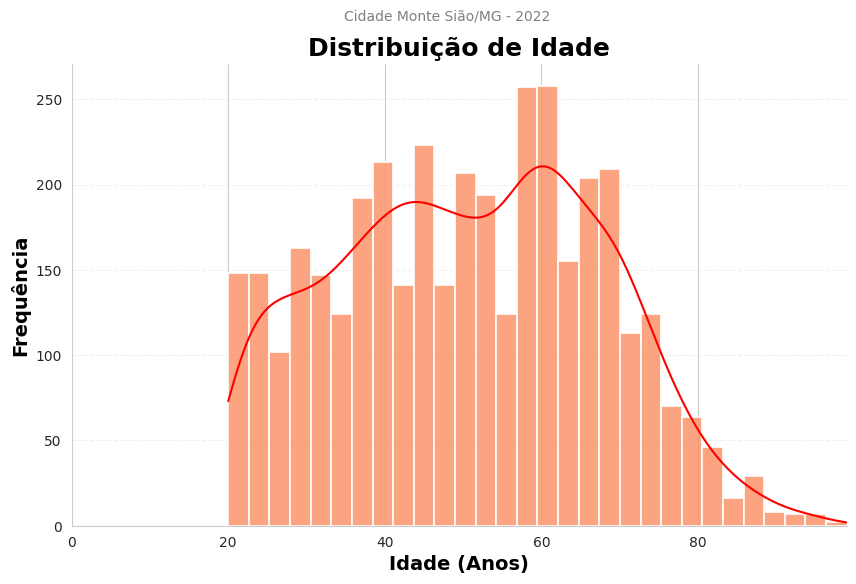

In [5]:
# Convertendo a coluna 'NU_IDADE_ANO' para int64
df['NU_IDADE_ANO'] = pd.to_numeric(df['NU_IDADE_ANO'], errors='coerce').astype('Int64')

# Estilo 
sns.set_style("whitegrid")

# Escolhendo uma paleta de cores mais intensa (excluindo rosa e roxo)
sns.set_palette(sns.color_palette("Set2", 10).as_hex()[::-1][:8])
color = sns.color_palette()[0]  

# Criando o histograma com bordas arredondadas
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x='NU_IDADE_ANO', bins=30, kde=True, color=color, alpha=0.8, edgecolor='w', linewidth=1.2)

# Ajustando a cor da linha kde (Kernel Density Estimation)
for line in ax.lines:
    line.set_color('red')

# Adicionando título e subtítulo centralizados
plt.title('Distribuição de Idade', fontsize=18, fontweight='bold', color='black', ha='center')
plt.suptitle('Cidade Monte Sião/MG - 2022', fontsize=10, y=0.97, color='grey', ha='center')

# Definindo limites dos eixos x e y para iniciar de 0
plt.xlim(0, df['NU_IDADE_ANO'].max())
plt.ylim(0, plt.ylim()[1])

# Adicionando rótulos aos eixos
plt.xlabel('Idade (Anos)', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Frequência', fontsize=14, fontweight='bold', color='black')

# Adicionando grid ao fundo do gráfico
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Removendo bordas desnecessárias
sns.despine()

# Exibindo o gráfico
plt.show()


### 2.2 Análise de fase da vida

/tmp/ipykernel_10636/1868485254.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=group_percentages.index, y=group_percentages, palette=colors)
/home/rafael/Área de Trabalho/sisvan/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rafael/Área de Trabalho/sisvan/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


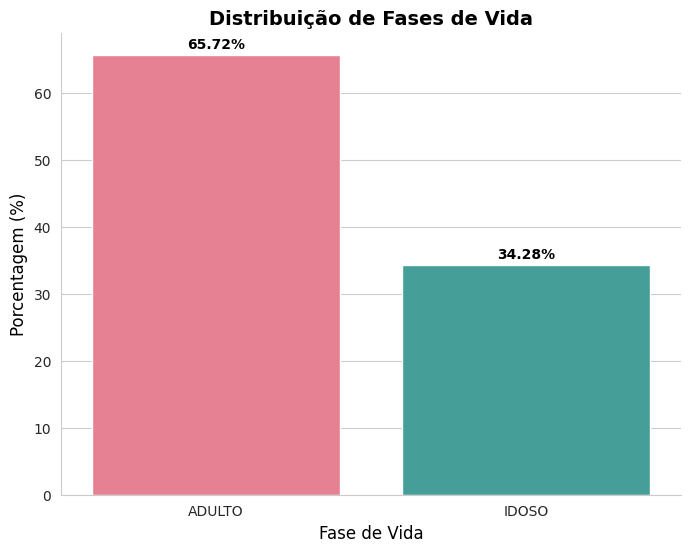

In [6]:
# Estilo mais elegante
sns.set_style("whitegrid")

# Agrupando por fase de vida e contando o número de ocorrências
group_counts = df['DS_FASE_VIDA'].value_counts()

# Calculando a porcentagem de cada fase
group_percentages = group_counts / group_counts.sum() * 100

# Escolhendo uma paleta de cores diferente para cada barra
colors = sns.color_palette("husl", len(group_percentages))

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=group_percentages.index, y=group_percentages, palette=colors)

# Adicionando rótulos e título
plt.title('Distribuição de Fases de Vida', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Fase de Vida', fontsize=12, color='black')
plt.ylabel('Porcentagem (%)', fontsize=12, color='black')

# Adicionando etiquetas de porcentagem acima de cada barra
for i, percentage in enumerate(group_percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', color='black', fontweight='bold')

# Removendo bordas desnecessárias
sns.despine()

# Exibindo o gráfico
plt.show()


### 2.3 Análise de sexo

/tmp/ipykernel_10636/1184874627.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=group_percentages.index, y=group_percentages, palette=colors)
/home/rafael/Área de Trabalho/sisvan/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rafael/Área de Trabalho/sisvan/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


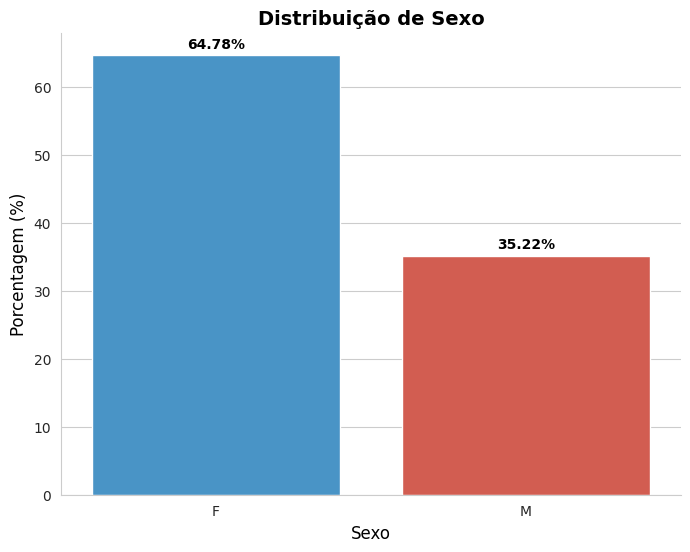

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo mais elegante
sns.set_style("whitegrid")

# Agrupando por fase de vida e contando o número de ocorrências
group_counts = df['SG_SEXO'].value_counts()

# Calculando a porcentagem de cada fase
group_percentages = group_counts / group_counts.sum() * 100

# Escolhendo cores manualmente
colors = ["#3498db", "#e74c3c"]  

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=group_percentages.index, y=group_percentages, palette=colors)

# Adicionando rótulos e título
plt.title('Distribuição de Sexo', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Sexo', fontsize=12, color='black')
plt.ylabel('Porcentagem (%)', fontsize=12, color='black')

# Adicionando etiquetas de porcentagem acima de cada barra
for i, percentage in enumerate(group_percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', color='black', fontweight='bold')

# Removendo bordas desnecessárias
sns.despine()

# Exibindo o gráfico
plt.show()



### 2.4 Cast de strings para float nas colunas abaixo

In [9]:
# Transformando dados de object para float
df['NU_PESO'] = pd.to_numeric(df['NU_PESO'].str.replace(',', '.'), errors='coerce')
df['NU_ALTURA'] = pd.to_numeric(df['NU_ALTURA'].str.replace(',', '.'), errors='coerce')
df['DS_IMC'] = pd.to_numeric(df['DS_IMC'].str.replace(',', '.'), errors='coerce')

### 2.5 Análise descritiva das colunas numericas

In [10]:
# Aplica o describe nas três colunas
descricao = df[['NU_PESO', 'NU_ALTURA', 'DS_IMC']].describe().round(2)

# Imprime as estatísticas descritivas
print(descricao)

       NU_PESO  NU_ALTURA   DS_IMC
count  3836.00    3836.00  3836.00
mean     75.43     163.06    28.33
std      17.44       9.32     5.92
min       0.87      70.00     0.00
25%      64.00     156.00    24.44
50%      73.15     163.00    27.55
75%      85.00     169.00    31.25
max     220.00     197.00    67.15


A análise descritiva dos dados revela  as características presentes no conjunto de dados. Para a variável `NU_PESO`, observa-se que a média é de aproximadamente 75.43 kg, com um desvio padrão de cerca de 17.44 kg. A distribuição mostra que o peso varia de 0.87 kg a 220 kg. Considerando que o conjunto de dados tem somente adultos e idosos, não tem como saber a natureza dessa amostra unica.

Quanto à variável `NU_ALTURA`, a média é aproximadamente 163.06 cm, com um desvio padrão de cerca de 9.32 cm. As alturas variam entre 70 cm e 197 cm, refletindo uma ampla gama de estaturas no conjunto de amostras.

No que diz respeito ao Índice de Massa Corporal (`DS_IMC`), a média é de aproximadamente 28.33, com um desvio padrão de cerca de 5.92. A faixa do IMC abrange de 0.00 a 67.15.

O primeiro quartil (25%) para a variável NU_PESO indica que 25% das observações de peso estão abaixo de aproximadamente 64 kg. O segundo quartil (50%), que corresponde à mediana, revela que metade das observações possui peso inferior a 73.15 kg. Por fim, o terceiro quartil (75%) mostra que 75% das observações têm peso inferior a 85 kg.

Para a variável NU_ALTURA, os quartis indicam que 25% das observações possuem altura inferior a 156 cm (primeiro quartil), 50% têm altura inferior a 163 cm (mediana) e 75% possuem altura inferior a 169 cm (terceiro quartil).

Analisando o Índice de Massa Corporal (DS_IMC), o primeiro quartil revela que 25% das observações apresentam um IMC inferior a 24.44, enquanto o segundo quartil (mediana) indica que 50% têm um IMC inferior a 27.55. Por fim, o terceiro quartil destaca que 75% das observações possuem um IMC inferior a 31.25.

### 2.6 Análise descritiva das colunas categoricas

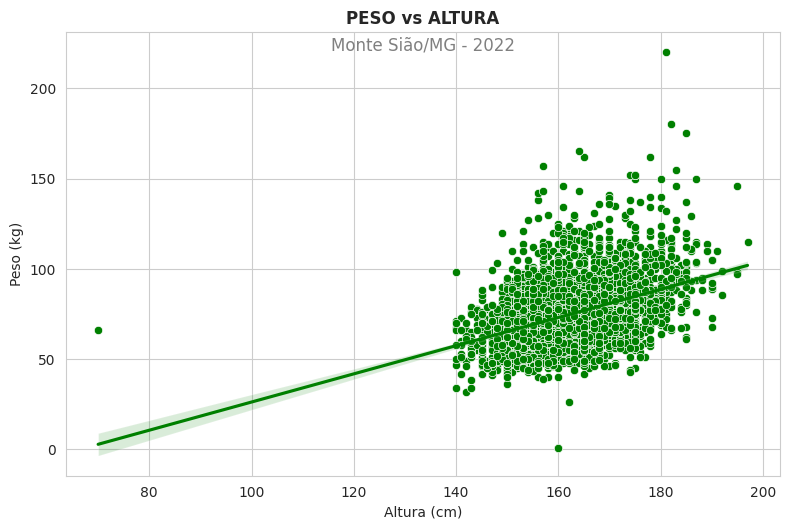

In [13]:
plt.figure(figsize=(8, 15))

# Scatter Plot para NU_PESO em relação a NU_ALTURA
plt.subplot(3, 1, 1)
sns.scatterplot(x='NU_ALTURA', y='NU_PESO', data=df, color='green')
sns.regplot(x='NU_ALTURA', y='NU_PESO', data=df, scatter=False, color='green')
plt.title('PESO vs ALTURA', fontweight='bold')  
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.tight_layout()

# Adicionando subtítulo abaixo do título principal
plt.annotate('Monte Sião/MG - 2022', xy=(0.5, 0.96), xycoords='axes fraction', ha='center', fontsize=12, color='gray')

plt.show()


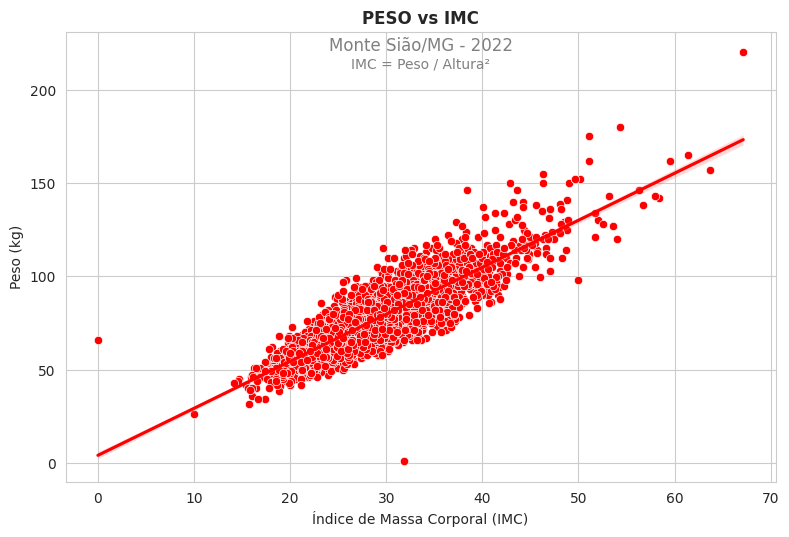

In [14]:
plt.figure(figsize=(8, 15))

# Scatter Plot para NU_PESO em relação a DS_IMC
plt.subplot(3, 1, 2)
sns.scatterplot(x='DS_IMC', y='NU_PESO', data=df, color='red')
sns.regplot(x='DS_IMC', y='NU_PESO', data=df, scatter=False, color='red')
plt.title('PESO vs IMC', fontweight='bold')
plt.xlabel('Índice de Massa Corporal (IMC)')
plt.ylabel('Peso (kg)')
plt.annotate('IMC = Peso / Altura²', xy=(0.5, 0.92), xycoords='axes fraction', ha='center', fontsize=10, color='gray')
plt.tight_layout()

# Adicionando subtítulo abaixo do título principal
plt.annotate('Monte Sião/MG - 2022', xy=(0.5, 0.96), xycoords='axes fraction', ha='center', fontsize=12, color='gray')

plt.show()

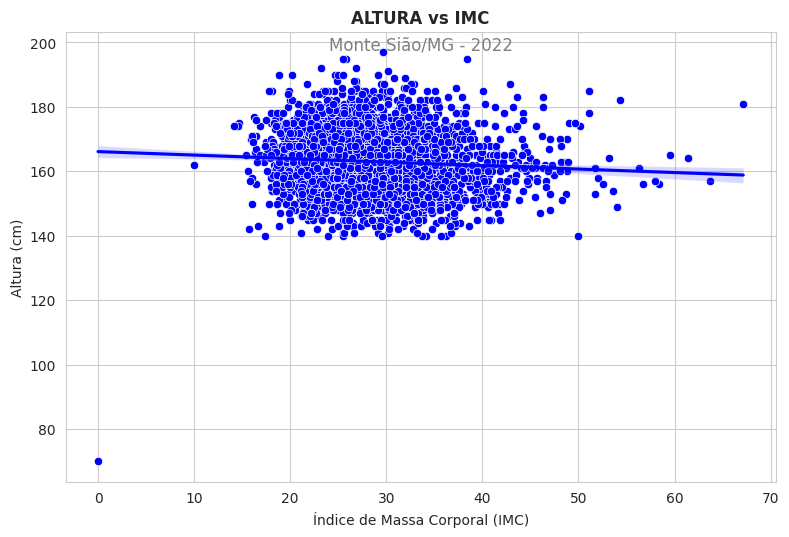

In [115]:
plt.figure(figsize=(8, 15))

# Scatter Plot para NU_ALTURA em relação a DS_IMC
plt.subplot(3, 1, 3)
sns.scatterplot(x='DS_IMC', y='NU_ALTURA', data=df, color='blue')
sns.regplot(x='DS_IMC', y='NU_ALTURA', data=df, scatter=False, color='blue')
plt.title('ALTURA vs IMC', fontweight='bold')
plt.xlabel('Índice de Massa Corporal (IMC)')
plt.ylabel('Altura (cm)')
plt.tight_layout()

# Adicionando subtítulo abaixo do título principal
plt.annotate('Monte Sião/MG - 2022', xy=(0.5, 0.96), xycoords='axes fraction', ha='center', fontsize=12, color='gray')

plt.show()

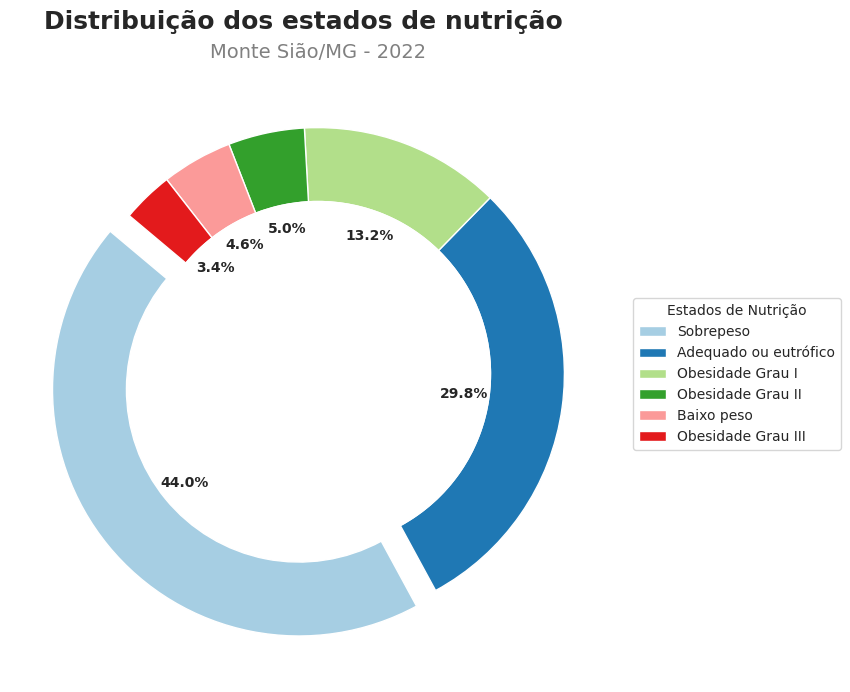

In [15]:
# Contagem dos estados de nutrição
contagem_estados = df['CO_ESTADO_NUTRI'].value_counts()

# Cálculo das porcentagens
porcentagens = contagem_estados / contagem_estados.sum() * 100

# Cores para o gráfico de donut
cores = plt.cm.Paired.colors

# Adiciona uma explosão para destacar uma fatia
explode = (0.1, 0, 0, 0, 0, 0)

# Ajustes visuais para tornar o gráfico mais bonito
plt.figure(figsize=(12, 8))

# Gráfico de donut
wedges, texts, autotexts = plt.pie(porcentagens, autopct='%1.1f%%', startangle=140, colors=cores, explode=explode,
                                  wedgeprops=dict(width=0.3), textprops={'weight': 'bold'})

# Adiciona um círculo branco no centro para criar um donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adiciona uma caixa de legenda ao lado
plt.legend(porcentagens.index, title='Estados de Nutrição', bbox_to_anchor=(1, 0.5), loc='center left')

# Adiciona título centralizado e subtítulo
plt.suptitle('Distribuição dos estados de nutrição', x=0.5, y=0.95, fontsize=18, ha='center', fontweight='bold')
plt.title('Monte Sião/MG - 2022', fontsize=14, color='gray')

plt.show()


## Seção 3 - Tratamento do conjunto de dados

### 3.1 Label Encoding (Codificação de Rótulos)

In [11]:
from sklearn.preprocessing import LabelEncoder

# Criando uma cópia do DataFrame original
df_clusterization = df.copy()

# Passo 1: Codificação das colunas categóricas
le = LabelEncoder()

df_clusterization['DS_FASE_VIDA'] = le.fit_transform(df_clusterization['DS_FASE_VIDA'])
df_clusterization['SG_SEXO'] = le.fit_transform(df_clusterization['SG_SEXO'])
df_clusterization['CO_ESTADO_NUTRI'] = le.fit_transform(df_clusterization['CO_ESTADO_NUTRI'])

# Passo 2: Exclusão das colunas desnecessárias
colunas_desnecessarias = ['CO_CNES', 'DT_ACOMPANHAMENTO', 'NU_COMPETENCIA']
df_clusterization = df_clusterization.drop(colunas_desnecessarias, axis=1)

df_clusterization

CO_ACOMPANHAMENTO  \
0     455FA09C6AE623A008EED25FF3B1ADB19290D9D7   
1     70BFCE196D8345BDF4D641B04C4F4E6E19C0B289   
2     67A340F29461447555E52D92D8ADD66D703398F6   
3     458B0450884D0F5CFA443D518E652EAC4CCDAE63   
4     B85162FD6C466A82908E9DC95574838304BDD0B5   
...                                        ...   
3831  495FAD886AB05384ECB278CAD674B8EE3D43E1E3   
3832  826B1BC53757CD481D13A54D864F385D0B651B6C   
3833  4AFC9710314E7F621FA1F6B796861E4DDF6D96E8   
3834  D3F577DB143CDDFC7BC37E429F3E34EBC2C3F70B   
3835  980A1BEC96E7C8B0BE318251A343ED7F66B88042   

                              CO_PESSOA_SISVAN  NU_IDADE_ANO  DS_FASE_VIDA  \
0     B5680467DA7144DF565999BDCB6E8195BECDB689            52             0   
1     1DC24A843C4347557763139BA3660306D5651277            27             0   
2     56305BAB97DC8C5CD87469151615228CCC842BC4            27             0   
3     7E50D21C7FD1A9F2BD50135670DD3ABAA1E58966            31             0   
4     64B00DA39AB2AF5FAD42E8F34D76F6380C341FB2            44             0   
...                                        ...           ...           ...   
3831  51C3079966C1F6BABECDB4652AD3D0C302D594A7            68             1   
3832  8BD31B1DCA2F42271A79F48141331E60B127924C            71             1   
3833  0E9ED48DFC8446E8A92C45E2BA8A2872CEFC401C            56             0   
3834  3AA3F4C359128FE737865105614C27AD78D6FBFC            54             0   
3835  66FE82C291862A152DE11EB004B1E0FC73EF3986            58             0   

      SG_SEXO  NU_PESO  NU_ALTURA  DS_IMC  CO_ESTADO_NUTRI  
0           0     53.0      157.0   21.50                0  
1           0     42.0      145.0   19.98                0  
2           1     70.0      180.0   21.60                0  
3           1     75.0      162.0   28.58                5  
4           1     95.0      162.0   36.20                3  
...       ...      ...        ...     ...              ...  
3831        0     77.0      172.0   26.03                0  
3832        1     48.0      158.0   19.23                1  
3833        0     75.5      168.0   26.75                5  
3834        0     77.0      165.0   28.28                5  
3835        0     49.8      153.0   21.27                0  

[3836 rows x 9 columns]

### 3.2 Normalização dos dados

In [13]:
from sklearn.preprocessing import StandardScaler

df_normalized = df_clusterization.copy()

# Seleciona as colunas para normalização
colunas_normalizar = ['NU_IDADE_ANO', 'NU_PESO', 'NU_ALTURA', 'DS_IMC']
df_normalized[colunas_normalizar] = StandardScaler().fit_transform(df_normalized[colunas_normalizar])

# Resultado final
df_normalized

CO_ACOMPANHAMENTO  \
0     455FA09C6AE623A008EED25FF3B1ADB19290D9D7   
1     70BFCE196D8345BDF4D641B04C4F4E6E19C0B289   
2     67A340F29461447555E52D92D8ADD66D703398F6   
3     458B0450884D0F5CFA443D518E652EAC4CCDAE63   
4     B85162FD6C466A82908E9DC95574838304BDD0B5   
...                                        ...   
3831  495FAD886AB05384ECB278CAD674B8EE3D43E1E3   
3832  826B1BC53757CD481D13A54D864F385D0B651B6C   
3833  4AFC9710314E7F621FA1F6B796861E4DDF6D96E8   
3834  D3F577DB143CDDFC7BC37E429F3E34EBC2C3F70B   
3835  980A1BEC96E7C8B0BE318251A343ED7F66B88042   

                              CO_PESSOA_SISVAN  NU_IDADE_ANO  DS_FASE_VIDA  \
0     B5680467DA7144DF565999BDCB6E8195BECDB689      0.071121             0   
1     1DC24A843C4347557763139BA3660306D5651277     -1.417755             0   
2     56305BAB97DC8C5CD87469151615228CCC842BC4     -1.417755             0   
3     7E50D21C7FD1A9F2BD50135670DD3ABAA1E58966     -1.179535             0   
4     64B00DA39AB2AF5FAD42E8F34D76F6380C341FB2     -0.405319             0   
...                                        ...           ...           ...   
3831  51C3079966C1F6BABECDB4652AD3D0C302D594A7      1.024003             1   
3832  8BD31B1DCA2F42271A79F48141331E60B127924C      1.202668             1   
3833  0E9ED48DFC8446E8A92C45E2BA8A2872CEFC401C      0.309342             0   
3834  3AA3F4C359128FE737865105614C27AD78D6FBFC      0.190232             0   
3835  66FE82C291862A152DE11EB004B1E0FC73EF3986      0.428452             0   

      SG_SEXO   NU_PESO  NU_ALTURA    DS_IMC  CO_ESTADO_NUTRI  
0           0 -1.286232  -0.650486 -1.154594                0  
1           0 -1.917052  -1.938020 -1.411469                0  
2           1 -0.311329   1.817289 -1.137695                0  
3           1 -0.024592  -0.114013  0.041901                5  
4           1  1.122353  -0.114013  1.329653                3  
...       ...       ...        ...       ...              ...  
3831        0  0.090102   0.958932 -0.389040                0  
3832        1 -1.572968  -0.543191 -1.538216                1  
3833        0  0.004081   0.529754 -0.267363                5  
3834        0  0.090102   0.207871 -0.008798                5  
3835        0 -1.469743  -1.079664 -1.193463                0  

[3836 rows x 9 columns]

### 3.3 Analise de correlação Spearman (mais adequada para dados categoricos)

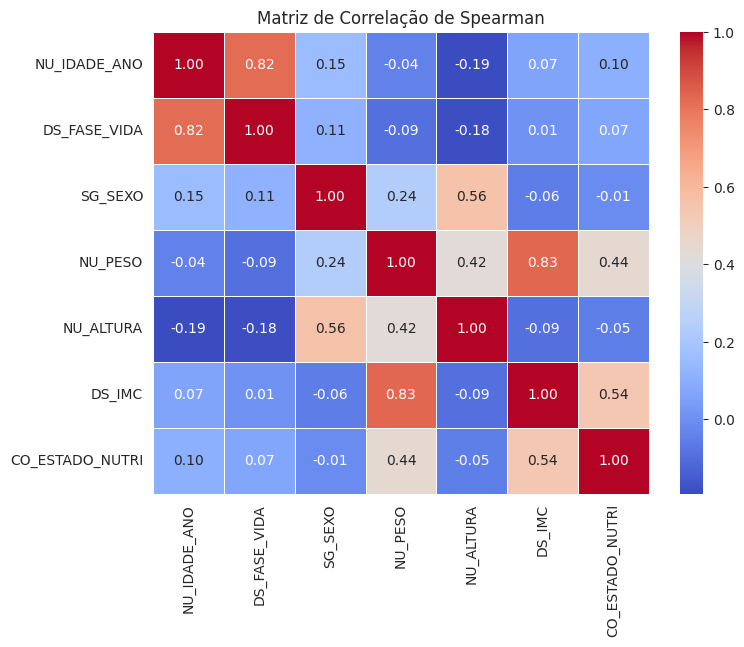

In [15]:
# Colunas de interesse
columns_of_interest = ['NU_IDADE_ANO', 'DS_FASE_VIDA', 'SG_SEXO', 'NU_PESO', 'NU_ALTURA', 'DS_IMC', 'CO_ESTADO_NUTRI']
df_selected = df_normalized[columns_of_interest]

# Calcula a correlação de Spearman
correlation_matrix_spearman = df_selected.corr(method='spearman')

# Cria um gráfico de calor com Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação de Spearman')
plt.show()


## Seção 4 - Agrupamentos

### 4.1 KModes - KPrototype

O KModes é uma extensão do algoritmo KMeans, adaptado para lidar com dados categóricos. Em vez de usar a média das observações, o KModes utiliza modas, ou seja, os valores mais frequentes em cada cluster. É especialmente eficaz quando lidamos com conjuntos de dados que contêm predominantemente variáveis categóricas. Seu uso é amplamente difundido em áreas como marketing, segmentação de clientes e análise de dados transacionais (Zhexue Huang, 1998). 

De acordo com Tzung-Pei Hong & Outros (2015), o KPrototypes é uma generalização que combina o KMeans tradicional para variáveis numéricas e o KModes para variáveis categóricas. Ele utiliza uma abordagem híbrida, permitindo que diferentes tipos de dados contribuam para a dissimilaridade entre clusters. Útil quando o conjunto de dados possui uma mistura de variáveis categóricas e numéricas. Aplicações incluem análise de mercado, agrupamento de perfis de clientes com informações demográficas e comportamentais.

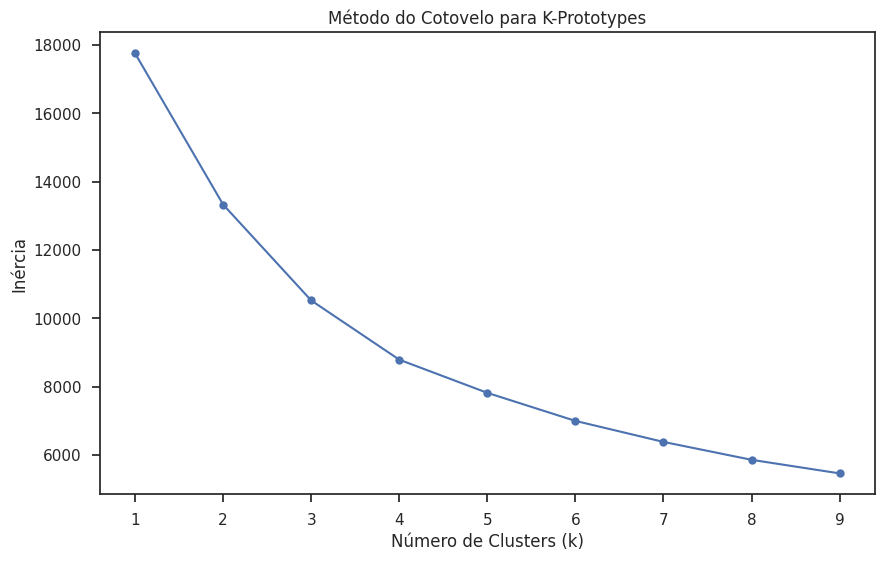

In [182]:
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes

# Seleciona as colunas para clusterização
colunas_clusterizar = ['NU_IDADE_ANO', 'DS_FASE_VIDA', 'SG_SEXO', 'NU_PESO', 'NU_ALTURA', 'DS_IMC', 'CO_ESTADO_NUTRI']

# Normaliza os dados
df_normalized = df_normalized[colunas_clusterizar]

# Lista para armazenar os valores de k e inércia
inercia = []

# Faixa de valores de k que você deseja testar
faixa_k = range(1, 10)

# Aplica o K-Prototypes para diferentes valores de k
for k in faixa_k:
    kproto = KPrototypes(n_clusters=k, init='Cao', n_init=10, verbose=0)
    kproto.fit_predict(df_normalized, categorical=[1, 2, 6])
    inercia.append(kproto.cost_)

# Visualiza o método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(faixa_k, inercia, marker='o')
plt.title('Método do Cotovelo para K-Prototypes')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.show()

In [16]:
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import MinMaxScaler

# Seleciona as colunas para clusterização
colunas_clusterizar = ['NU_IDADE_ANO', 'DS_FASE_VIDA', 'SG_SEXO', 'NU_PESO', 'NU_ALTURA', 'DS_IMC', 'CO_ESTADO_NUTRI']

# Separa os dados
df_normalizado = df_normalized[colunas_clusterizar]

# Especifica o número de clusters desejado (k=4)
n_clusters = 4

# Cria uma instância do K-Prototypes
kproto = KPrototypes(n_clusters=n_clusters, init='Cao', n_init=10, verbose=2)

# Aplica o K-Prototypes aos dados
clusters = kproto.fit_predict(df_normalizado, categorical=[1, 2, 6])

# Adiciona os rótulos dos clusters de volta ao DataFrame
df_clusterization['Cluster_KPrototype'] = clusters

# Visualiza o resultado
df_clusterization


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 842, ncost: 9864.544566838515
Run: 1, iteration: 2/100, moves: 312, ncost: 9764.49643848745
Run: 1, iteration: 3/100, moves: 212, ncost: 9657.673272484804
Run: 1, iteration: 4/100, moves: 266, ncost: 9583.96949833566
Run: 1, iteration: 5/100, moves: 160, ncost: 9543.38876225624
Run: 1, iteration: 6/100, moves: 124, ncost: 9522.620249681297
Run: 1, iteration: 7/100, moves: 152, ncost: 9466.657131230211
Run: 1, iteration: 8/100, moves: 120, ncost: 9423.29337300181
Run: 1, iteration: 9/100, moves: 112, ncost: 9408.88062851005
Run: 1, iteration: 10/100, moves: 45, ncost: 9404.654900374653
Run: 1, iteration: 11/100, moves: 50, ncost: 9401.62493272275
Run: 1, iteration: 12/100, moves: 18, ncost: 9401.261948128855
Run: 1, iteration: 13/100, moves: 15, ncost: 9400.883233180159
Run: 1, iteration: 14/100, move

CO_ACOMPANHAMENTO  \
0     455FA09C6AE623A008EED25FF3B1ADB19290D9D7   
1     70BFCE196D8345BDF4D641B04C4F4E6E19C0B289   
2     67A340F29461447555E52D92D8ADD66D703398F6   
3     458B0450884D0F5CFA443D518E652EAC4CCDAE63   
4     B85162FD6C466A82908E9DC95574838304BDD0B5   
...                                        ...   
3831  495FAD886AB05384ECB278CAD674B8EE3D43E1E3   
3832  826B1BC53757CD481D13A54D864F385D0B651B6C   
3833  4AFC9710314E7F621FA1F6B796861E4DDF6D96E8   
3834  D3F577DB143CDDFC7BC37E429F3E34EBC2C3F70B   
3835  980A1BEC96E7C8B0BE318251A343ED7F66B88042   

                              CO_PESSOA_SISVAN  NU_IDADE_ANO  DS_FASE_VIDA  \
0     B5680467DA7144DF565999BDCB6E8195BECDB689            52             0   
1     1DC24A843C4347557763139BA3660306D5651277            27             0   
2     56305BAB97DC8C5CD87469151615228CCC842BC4            27             0   
3     7E50D21C7FD1A9F2BD50135670DD3ABAA1E58966            31             0   
4     64B00DA39AB2AF5FAD42E8F34D76F6380C341FB2            44             0   
...                                        ...           ...           ...   
3831  51C3079966C1F6BABECDB4652AD3D0C302D594A7            68             1   
3832  8BD31B1DCA2F42271A79F48141331E60B127924C            71             1   
3833  0E9ED48DFC8446E8A92C45E2BA8A2872CEFC401C            56             0   
3834  3AA3F4C359128FE737865105614C27AD78D6FBFC            54             0   
3835  66FE82C291862A152DE11EB004B1E0FC73EF3986            58             0   

      SG_SEXO  NU_PESO  NU_ALTURA  DS_IMC  CO_ESTADO_NUTRI  Cluster_KPrototype  
0           0     53.0      157.0   21.50                0                   3  
1           0     42.0      145.0   19.98                0                   3  
2           1     70.0      180.0   21.60                0                   0  
3           1     75.0      162.0   28.58                5                   3  
4           1     95.0      162.0   36.20                3                   2  
...       ...      ...        ...     ...              ...                 ...  
3831        0     77.0      172.0   26.03                0                   0  
3832        1     48.0      158.0   19.23                1                   1  
3833        0     75.5      168.0   26.75                5                   0  
3834        0     77.0      165.0   28.28                5                   0  
3835        0     49.8      153.0   21.27                0                   3  

[3836 rows x 10 columns]

/home/rafael/Área de Trabalho/sisvan/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rafael/Área de Trabalho/sisvan/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rafael/Área de Trabalho/sisvan/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

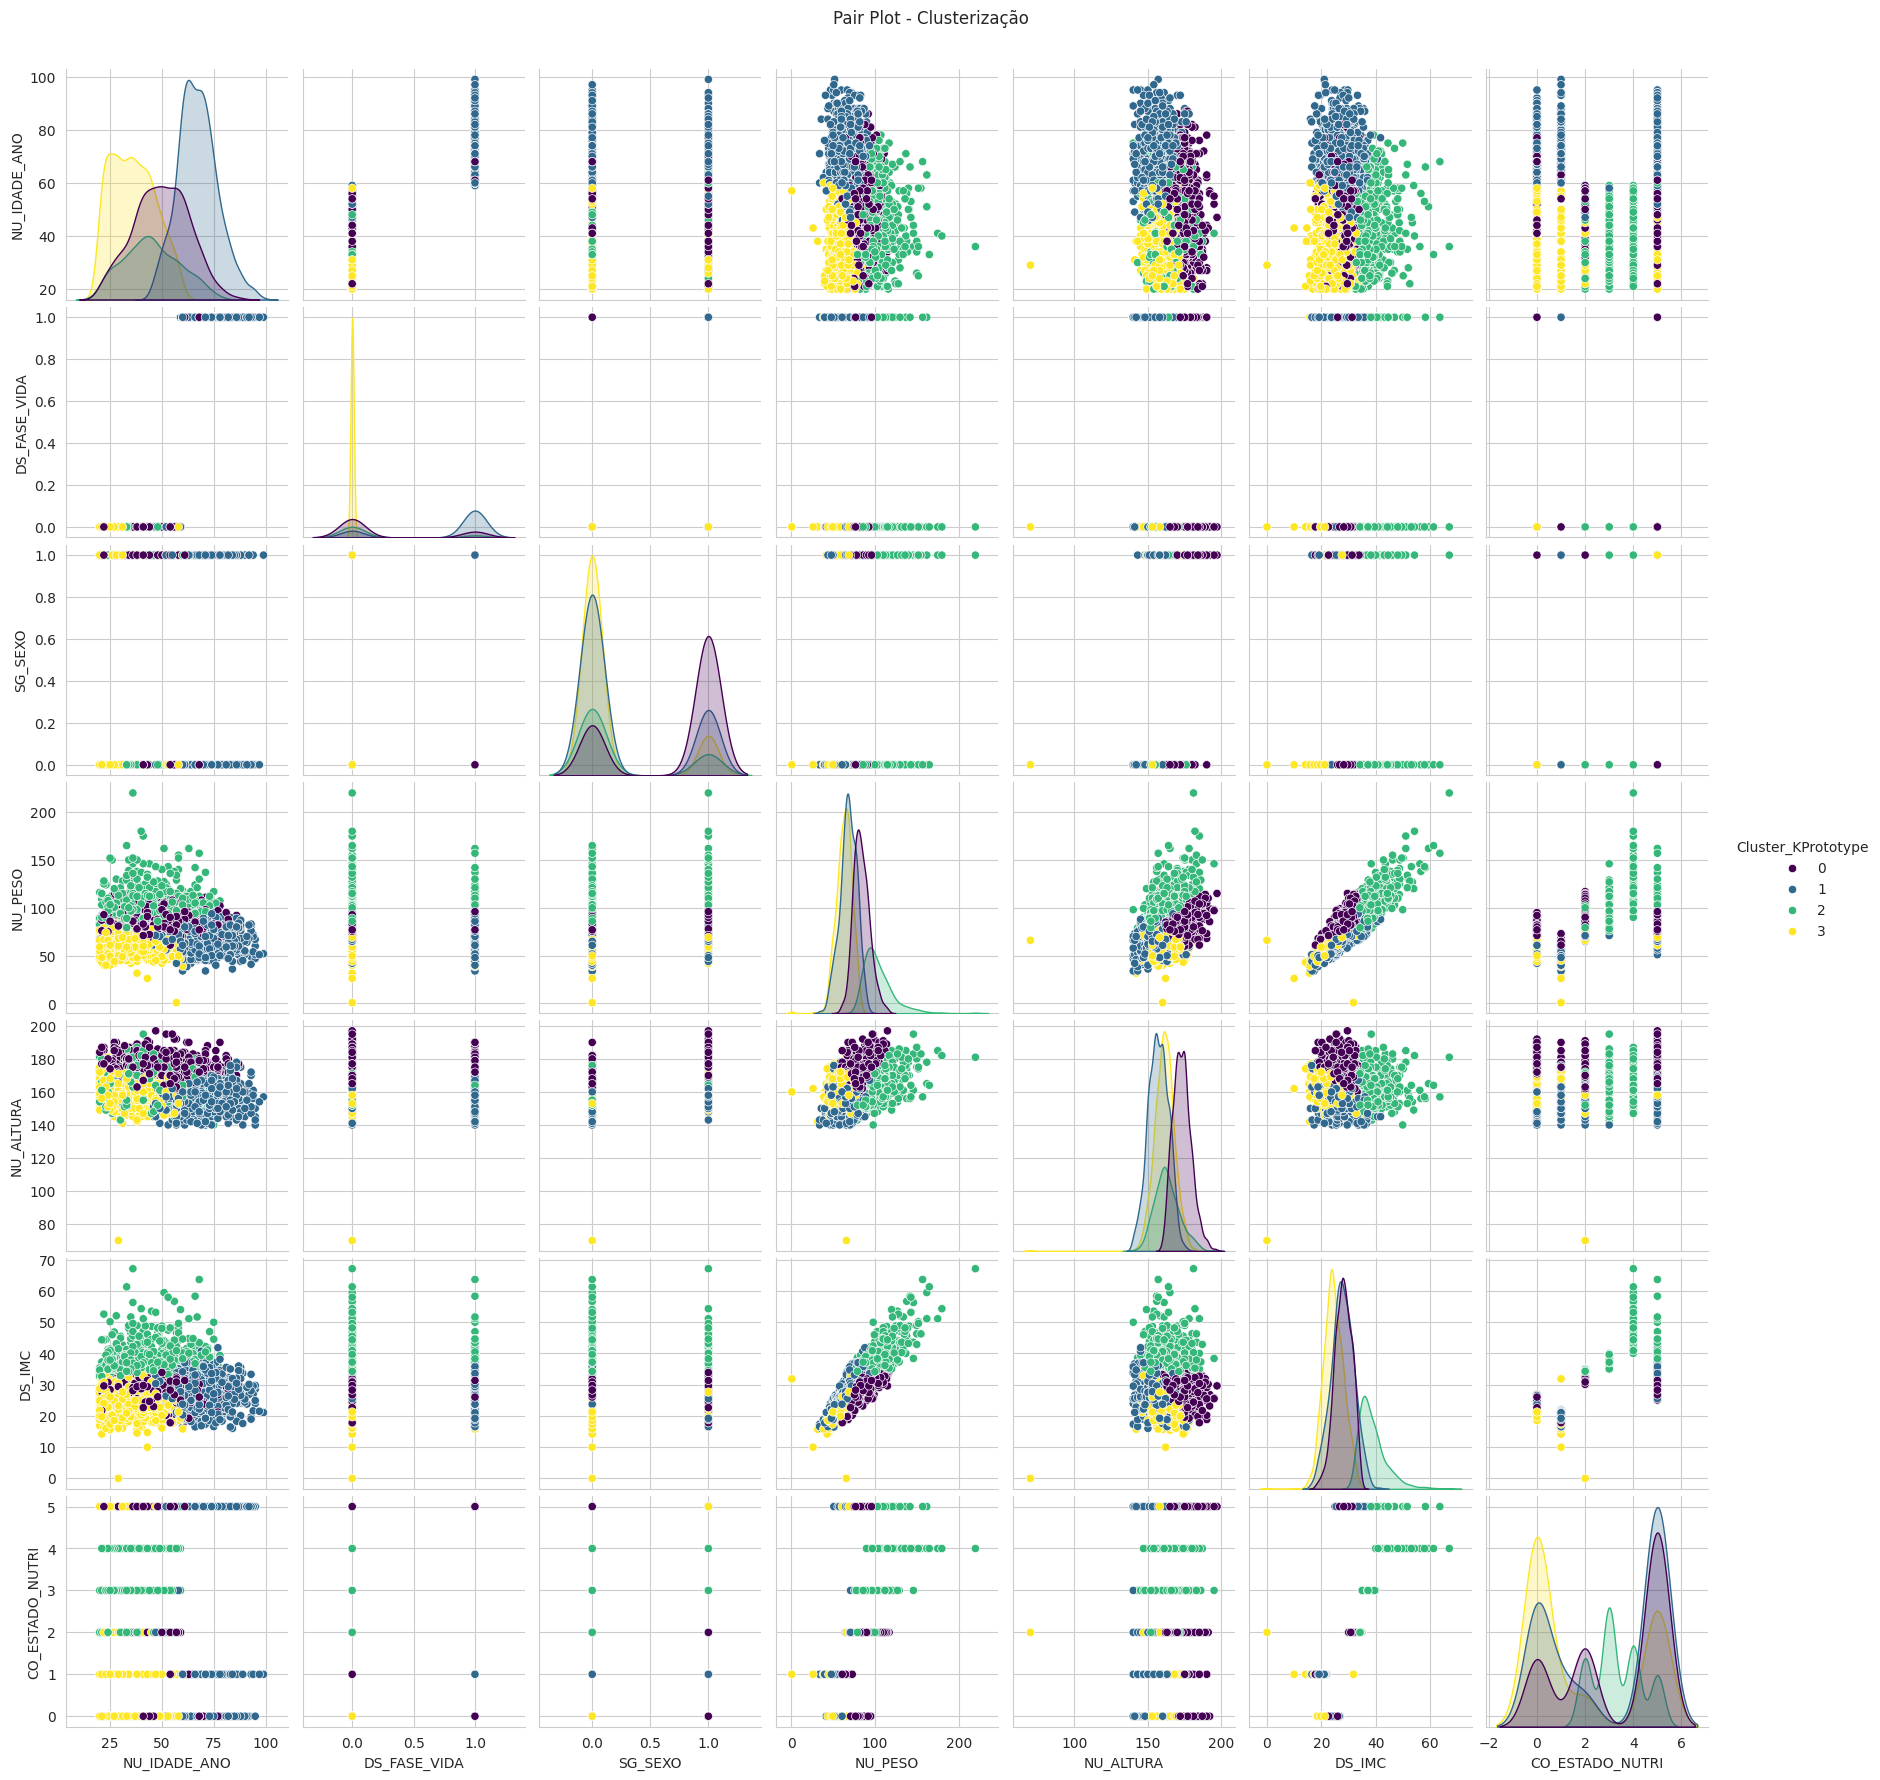

In [17]:
# Cria um pair plot
sns.pairplot(df_clusterization, hue='Cluster_KPrototype', palette='viridis')
plt.suptitle('Pair Plot - Clusterização', y=1.02)
plt.show()


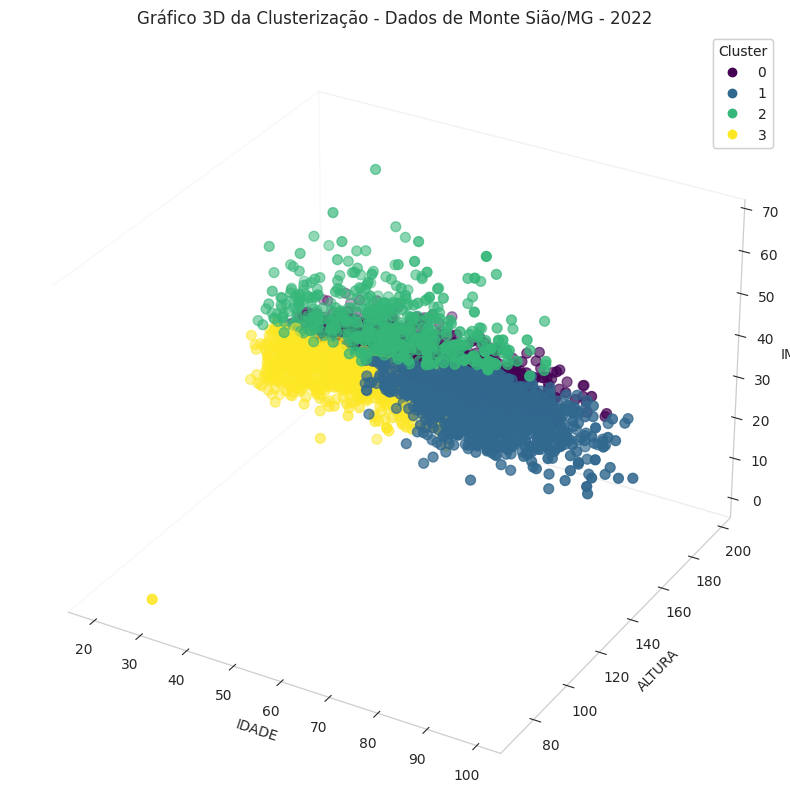

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Cria um gráfico 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Adiciona pontos ao gráfico 3D com coloração por cluster usando seaborn para a legenda
scatter = ax.scatter(df_clusterization['NU_IDADE_ANO'],
                     df_clusterization['NU_ALTURA'],
                     df_clusterization['DS_IMC'],
                     c=df_clusterization['Cluster_KPrototype'],
                     cmap='viridis',
                     s=50)

# Configuração dos rótulos do gráfico
ax.set_xlabel('IDADE')
ax.set_ylabel('ALTURA')
ax.set_zlabel('IMC')
ax.set_title('Gráfico 3D da Clusterização - Dados de Monte Sião/MG - 2022')

# Adiciona uma legenda
legend = ax.legend(*scatter.legend_elements(), title='Cluster', loc='upper right')
ax.add_artist(legend)

# Adiciona um plano de fundo mais claro
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)

plt.show()


### 4.2 PCA - KPrototype

PCA é uma técnica de redução de dimensionalidade que transforma as variáveis originais em um conjunto menor de variáveis (componentes principais) que mantêm a maior parte da variabilidade dos dados. Ao aplicar o PCA antes do KPrototypes, é possível reduzir a dimensionalidade do conjunto de dados, preservando ao mesmo tempo as informações mais significativas. Isso é particularmente útil quando lidamos com conjuntos de dados heterogêneos que possuem variáveis numéricas e categóricas. (Jolliffe, I. T., 2002)

De acordo com Tzung-Pei Hong & Outros (2015), a redução de dimensionalidade pode ajudar a remover ruídos e redundâncias nos dados.Com menos variáveis, o KPrototypes pode ser mais eficaz na identificação de padrões em conjuntos de dados complexos.

In [19]:
from sklearn.decomposition import PCA
from kmodes.kprototypes import KPrototypes

# Copia o DataFrame original para resguardar os dados
df_pca = df_normalized.copy()

# Seleciona as colunas numéricas para o PCA
colunas_numericas = ['NU_IDADE_ANO', 'NU_PESO', 'NU_ALTURA']

# Salva os dados numéricos
df_pca_numeric = df_pca[colunas_numericas]

# Aplica o PCA apenas nas colunas numéricas
pca = PCA(n_components=2)
componentes_principais = pca.fit_transform(df_pca_numeric)

# Adiciona os componentes principais ao DataFrame
df_pca['PCA_1'] = componentes_principais[:, 0]
df_pca['PCA_2'] = componentes_principais[:, 1]

# Seleciona todas as colunas relevantes para o K-Prototypes, incluindo os componentes principais
colunas_clusterizar_pca = ['PCA_1', 'PCA_2', 'DS_FASE_VIDA', 'SG_SEXO', 'DS_IMC', 'CO_ESTADO_NUTRI']

# Cria uma instância do K-Prototypes
kproto_pca = KPrototypes(n_clusters=4, init='Cao', n_init=10, verbose=2)

# Aplica o K-Prototypes aos dados, usando apenas os componentes principais e colunas categóricas
clusters_pca = kproto_pca.fit_predict(df_pca[colunas_clusterizar_pca], categorical=[2, 3, 4, 5])

# Adiciona os rótulos dos clusters de volta ao DataFrame
df_clusterization['Cluster_PCA_KPrototype'] = clusters_pca

# Visualiza o resultado
df_clusterization


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 984, ncost: 7397.775934296088
Run: 1, iteration: 2/100, moves: 233, ncost: 7348.046147447939
Run: 1, iteration: 3/100, moves: 203, ncost: 7307.571955118731
Run: 1, iteration: 4/100, moves: 336, ncost: 7135.4271309007145
Run: 1, iteration: 5/100, moves: 155, ncost: 7056.288299997193
Run: 1, iteration: 6/100, moves: 285, ncost: 7003.260663628685
Run: 1, iteration: 7/100, moves: 100, ncost: 6996.4027518948415
Run: 1, iteration: 8/100, moves: 26, ncost: 6996.021667817031
Run: 1, iteration: 9/100, moves: 8, ncost: 6995.954183321744
Run: 1, iteration: 10/100, moves: 6, ncost: 6995.914511968618
Run: 1, iteration: 11/100, moves: 8, ncost: 6995.796035881805
Run: 1, iteration: 12/100, moves: 5, ncost: 6995.749061342165
Run: 1, iteration: 13/100, moves: 2, ncost: 6995.743369161042
Run: 1, iteration: 14/100, mov

CO_ACOMPANHAMENTO  \
0     455FA09C6AE623A008EED25FF3B1ADB19290D9D7   
1     70BFCE196D8345BDF4D641B04C4F4E6E19C0B289   
2     67A340F29461447555E52D92D8ADD66D703398F6   
3     458B0450884D0F5CFA443D518E652EAC4CCDAE63   
4     B85162FD6C466A82908E9DC95574838304BDD0B5   
...                                        ...   
3831  495FAD886AB05384ECB278CAD674B8EE3D43E1E3   
3832  826B1BC53757CD481D13A54D864F385D0B651B6C   
3833  4AFC9710314E7F621FA1F6B796861E4DDF6D96E8   
3834  D3F577DB143CDDFC7BC37E429F3E34EBC2C3F70B   
3835  980A1BEC96E7C8B0BE318251A343ED7F66B88042   

                              CO_PESSOA_SISVAN  NU_IDADE_ANO  DS_FASE_VIDA  \
0     B5680467DA7144DF565999BDCB6E8195BECDB689            52             0   
1     1DC24A843C4347557763139BA3660306D5651277            27             0   
2     56305BAB97DC8C5CD87469151615228CCC842BC4            27             0   
3     7E50D21C7FD1A9F2BD50135670DD3ABAA1E58966            31             0   
4     64B00DA39AB2AF5FAD42E8F34D76F6380C341FB2            44             0   
...                                        ...           ...           ...   
3831  51C3079966C1F6BABECDB4652AD3D0C302D594A7            68             1   
3832  8BD31B1DCA2F42271A79F48141331E60B127924C            71             1   
3833  0E9ED48DFC8446E8A92C45E2BA8A2872CEFC401C            56             0   
3834  3AA3F4C359128FE737865105614C27AD78D6FBFC            54             0   
3835  66FE82C291862A152DE11EB004B1E0FC73EF3986            58             0   

      SG_SEXO  NU_PESO  NU_ALTURA  DS_IMC  CO_ESTADO_NUTRI  \
0           0     53.0      157.0   21.50                0   
1           0     42.0      145.0   19.98                0   
2           1     70.0      180.0   21.60                0   
3           1     75.0      162.0   28.58                5   
4           1     95.0      162.0   36.20                3   
...       ...      ...        ...     ...              ...   
3831        0     77.0      172.0   26.03                0   
3832        1     48.0      158.0   19.23                1   
3833        0     75.5      168.0   26.75                5   
3834        0     77.0      165.0   28.28                5   
3835        0     49.8      153.0   21.27                0   

      Cluster_KPrototype  Cluster_PCA_KPrototype  
0                      3                       1  
1                      3                       1  
2                      0                       2  
3                      3                       1  
4                      2                       2  
...                  ...                     ...  
3831                   0                       3  
3832                   1                       0  
3833                   0                       3  
3834                   0                       3  
3835                   3                       0  

[3836 rows x 11 columns]

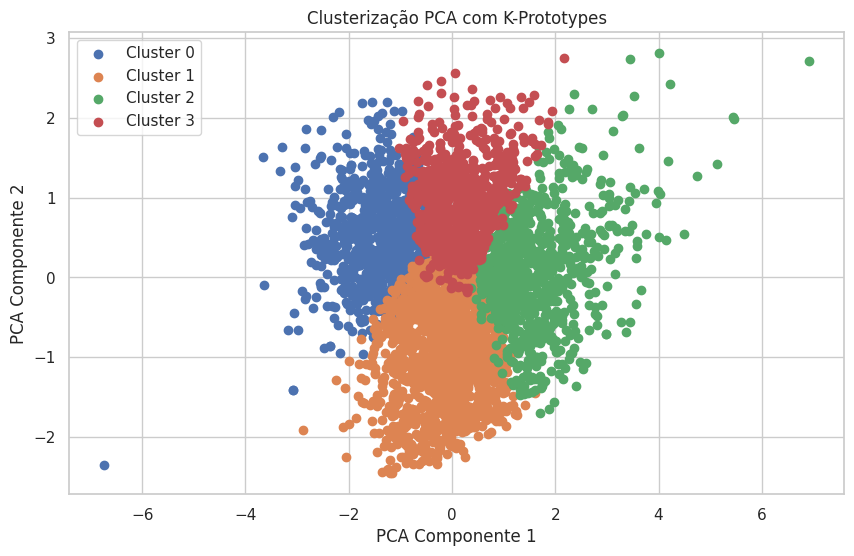

In [27]:
import matplotlib.pyplot as plt

# Cria um gráfico de dispersão com os pontos coloridos pelos clusters
plt.figure(figsize=(10, 6))

for cluster in range(4):  
    cluster_points = df_pca[df_clusterization['Cluster_PCA_KPrototype'] == cluster]
    plt.scatter(cluster_points['PCA_1'], cluster_points['PCA_2'], label=f'Cluster {cluster}')

# Adiciona rótulos e legendas
plt.title('Clusterização PCA com K-Prototypes')
plt.xlabel('PCA Componente 1')
plt.ylabel('PCA Componente 2')
plt.legend()
plt.grid(True)

# Mostra o gráfico
plt.show()

### 4.3 Kmeans

In [23]:
from sklearn.cluster import KMeans

# Seleciona as colunas para clusterização
colunas_clusterizar = ['NU_IDADE_ANO', 'DS_FASE_VIDA', 'SG_SEXO', 'NU_PESO', 'NU_ALTURA', 'DS_IMC', 'CO_ESTADO_NUTRI']

# Obtém os dados normalizados
df_kmeans = df_normalized[colunas_clusterizar]

# Especifica o número de clusters desejado (k=4)
n_clusters_kmeans = 4

# Cria uma instância do KMeans
kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=42)

# Aplica o KMeans aos dados
clusters_kmeans = kmeans.fit_predict(df_kmeans)

# Adiciona os rótulos dos clusters de volta ao DataFrame df_clusterization
df_clusterization['Cluster_Kmeans'] = clusters_kmeans

# Visualiza o resultado
df_clusterization


CO_ACOMPANHAMENTO  \
0     455FA09C6AE623A008EED25FF3B1ADB19290D9D7   
1     70BFCE196D8345BDF4D641B04C4F4E6E19C0B289   
2     67A340F29461447555E52D92D8ADD66D703398F6   
3     458B0450884D0F5CFA443D518E652EAC4CCDAE63   
4     B85162FD6C466A82908E9DC95574838304BDD0B5   
...                                        ...   
3831  495FAD886AB05384ECB278CAD674B8EE3D43E1E3   
3832  826B1BC53757CD481D13A54D864F385D0B651B6C   
3833  4AFC9710314E7F621FA1F6B796861E4DDF6D96E8   
3834  D3F577DB143CDDFC7BC37E429F3E34EBC2C3F70B   
3835  980A1BEC96E7C8B0BE318251A343ED7F66B88042   

                              CO_PESSOA_SISVAN  NU_IDADE_ANO  DS_FASE_VIDA  \
0     B5680467DA7144DF565999BDCB6E8195BECDB689            52             0   
1     1DC24A843C4347557763139BA3660306D5651277            27             0   
2     56305BAB97DC8C5CD87469151615228CCC842BC4            27             0   
3     7E50D21C7FD1A9F2BD50135670DD3ABAA1E58966            31             0   
4     64B00DA39AB2AF5FAD42E8F34D76F6380C341FB2            44             0   
...                                        ...           ...           ...   
3831  51C3079966C1F6BABECDB4652AD3D0C302D594A7            68             1   
3832  8BD31B1DCA2F42271A79F48141331E60B127924C            71             1   
3833  0E9ED48DFC8446E8A92C45E2BA8A2872CEFC401C            56             0   
3834  3AA3F4C359128FE737865105614C27AD78D6FBFC            54             0   
3835  66FE82C291862A152DE11EB004B1E0FC73EF3986            58             0   

      SG_SEXO  NU_PESO  NU_ALTURA  DS_IMC  CO_ESTADO_NUTRI  \
0           0     53.0      157.0   21.50                0   
1           0     42.0      145.0   19.98                0   
2           1     70.0      180.0   21.60                0   
3           1     75.0      162.0   28.58                5   
4           1     95.0      162.0   36.20                3   
...       ...      ...        ...     ...              ...   
3831        0     77.0      172.0   26.03                0   
3832        1     48.0      158.0   19.23                1   
3833        0     75.5      168.0   26.75                5   
3834        0     77.0      165.0   28.28                5   
3835        0     49.8      153.0   21.27                0   

      Cluster_KPrototype  Cluster_PCA_KPrototype  Cluster_Kmeans  
0                      3                       1               1  
1                      3                       1               1  
2                      0                       2               1  
3                      3                       1               3  
4                      2                       2               2  
...                  ...                     ...             ...  
3831                   0                       3               1  
3832                   1                       0               1  
3833                   0                       3               3  
3834                   0                       3               3  
3835                   3                       0               1  

[3836 rows x 12 columns]

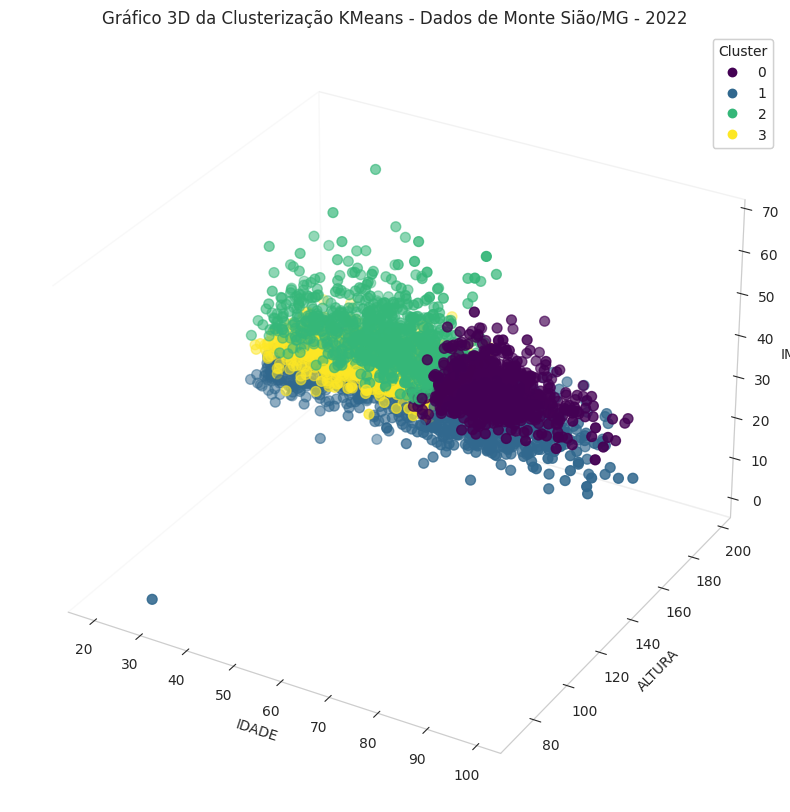

/home/rafael/Área de Trabalho/sisvan/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rafael/Área de Trabalho/sisvan/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rafael/Área de Trabalho/sisvan/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

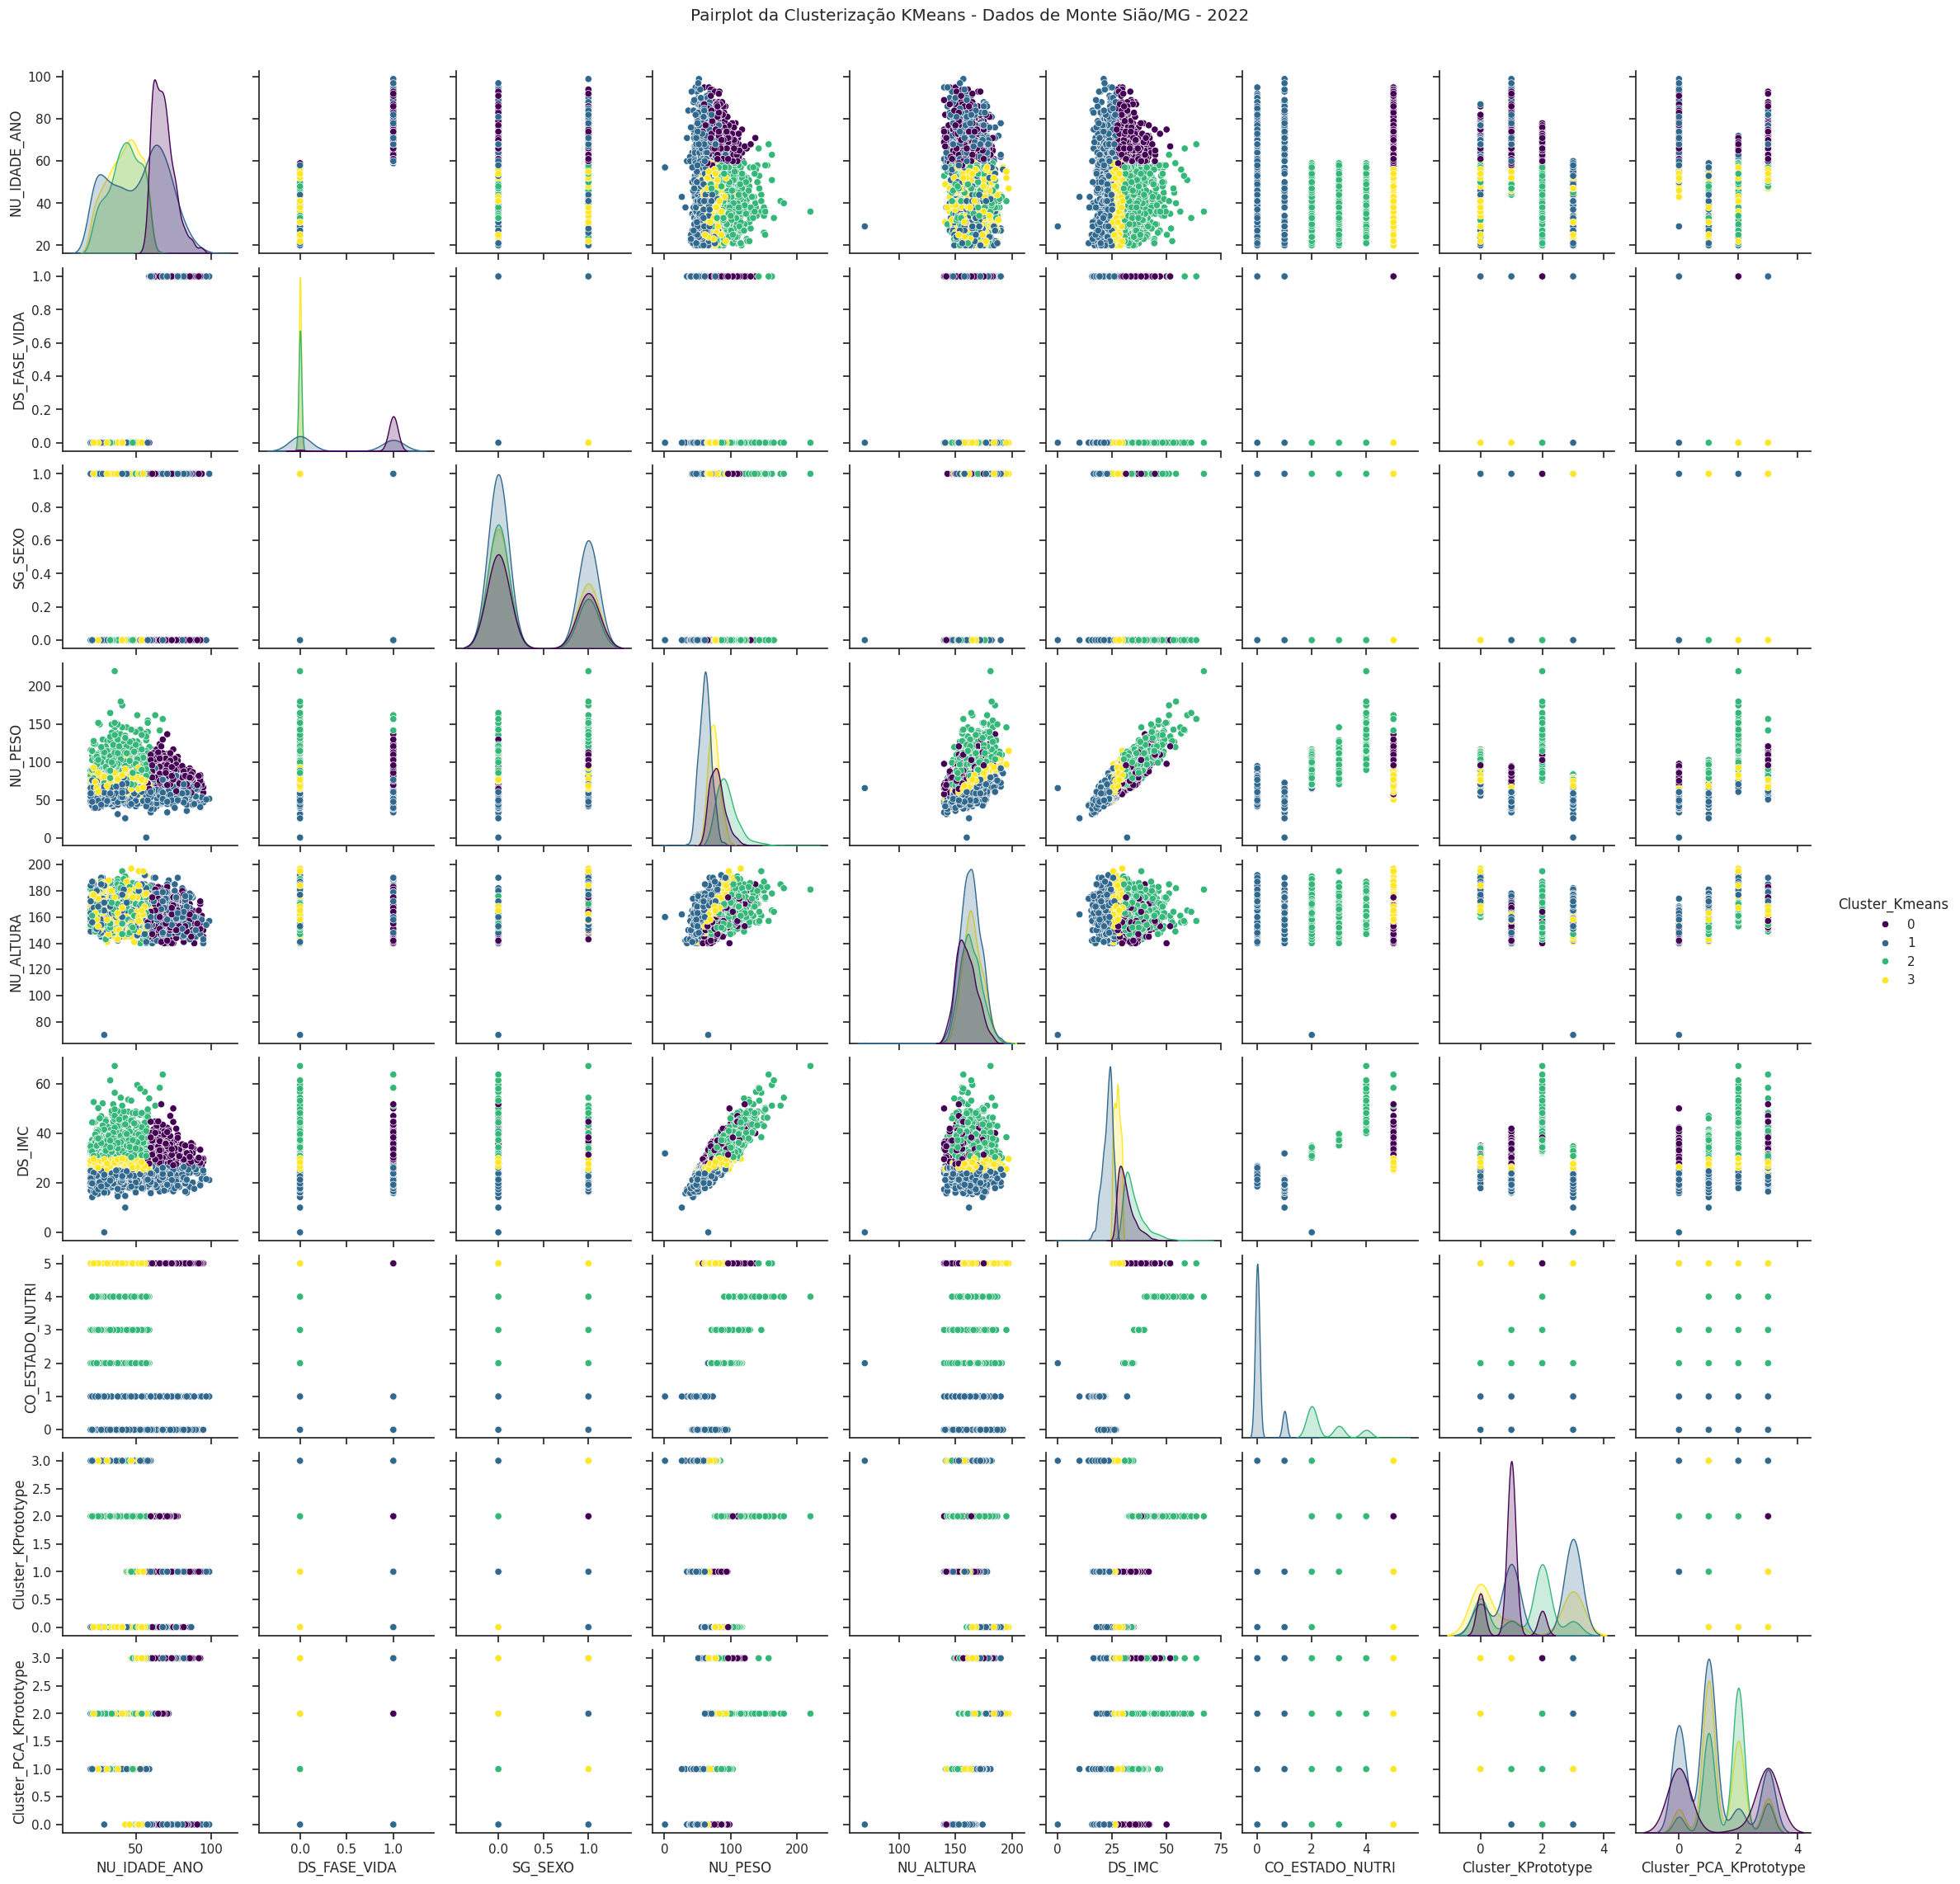

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Cria um gráfico 3D para a clusterização KMeans
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_clusterization['NU_IDADE_ANO'],
                     df_clusterization['NU_ALTURA'],
                     df_clusterization['DS_IMC'],
                     c=df_clusterization['Cluster_Kmeans'],
                     cmap='viridis',
                     s=50)

ax.set_xlabel('IDADE')
ax.set_ylabel('ALTURA')
ax.set_zlabel('IMC')
ax.set_title('Gráfico 3D da Clusterização KMeans - Dados de Monte Sião/MG - 2022')

legend = ax.legend(*scatter.legend_elements(), title='Cluster', loc='upper right')
ax.add_artist(legend)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)

plt.show()

# Cria um pairplot para a clusterização KMeans
sns.set(style="ticks")
sns.pairplot(df_clusterization, hue='Cluster_Kmeans', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot da Clusterização KMeans - Dados de Monte Sião/MG - 2022', y=1.02)
plt.show()


### 4.4 PCA - KMeans

In [27]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Copia o DataFrame original para resguardar os dados
df_pca_kmeans = df_normalized.drop(['CO_ACOMPANHAMENTO','CO_PESSOA_SISVAN'], axis=1)

# Seleciona as colunas relevantes para o KMeans, incluindo os componentes principais
colunas_clusterizar_kmeans = ['NU_IDADE_ANO', 'NU_PESO', 'NU_ALTURA', 'DS_FASE_VIDA', 'SG_SEXO', 'DS_IMC', 'CO_ESTADO_NUTRI']

# Salva os dados relevantes
df_kmeans = df_pca_kmeans[colunas_clusterizar_kmeans]

# Aplica o PCA apenas nas colunas numéricas
colunas_numericas_kmeans = ['NU_IDADE_ANO', 'NU_PESO', 'NU_ALTURA']
df_pca_numeric_kmeans = df_pca_kmeans[colunas_numericas_kmeans]

pca_kmeans = PCA(n_components=2)
componentes_principais_kmeans = pca_kmeans.fit_transform(df_pca_numeric_kmeans)

# Adiciona os componentes principais ao DataFrame
df_pca_kmeans['PCA_1'] = componentes_principais_kmeans[:, 0]
df_pca_kmeans['PCA_2'] = componentes_principais_kmeans[:, 1]

# Cria uma instância do KMeans
kmeans = KMeans(n_clusters=4, random_state=42)

# Aplica o KMeans aos dados
clusters_kmeans = kmeans.fit_predict(df_pca_kmeans)

# Adiciona os rótulos dos clusters de volta ao DataFrame df_clusterization
df_clusterization['Cluster_PCA_KMeans'] = clusters_kmeans

# Visualiza o resultado
df_clusterization


CO_ACOMPANHAMENTO  \
0     455FA09C6AE623A008EED25FF3B1ADB19290D9D7   
1     70BFCE196D8345BDF4D641B04C4F4E6E19C0B289   
2     67A340F29461447555E52D92D8ADD66D703398F6   
3     458B0450884D0F5CFA443D518E652EAC4CCDAE63   
4     B85162FD6C466A82908E9DC95574838304BDD0B5   
...                                        ...   
3831  495FAD886AB05384ECB278CAD674B8EE3D43E1E3   
3832  826B1BC53757CD481D13A54D864F385D0B651B6C   
3833  4AFC9710314E7F621FA1F6B796861E4DDF6D96E8   
3834  D3F577DB143CDDFC7BC37E429F3E34EBC2C3F70B   
3835  980A1BEC96E7C8B0BE318251A343ED7F66B88042   

                              CO_PESSOA_SISVAN  NU_IDADE_ANO  DS_FASE_VIDA  \
0     B5680467DA7144DF565999BDCB6E8195BECDB689            52             0   
1     1DC24A843C4347557763139BA3660306D5651277            27             0   
2     56305BAB97DC8C5CD87469151615228CCC842BC4            27             0   
3     7E50D21C7FD1A9F2BD50135670DD3ABAA1E58966            31             0   
4     64B00DA39AB2AF5FAD42E8F34D76F6380C341FB2            44             0   
...                                        ...           ...           ...   
3831  51C3079966C1F6BABECDB4652AD3D0C302D594A7            68             1   
3832  8BD31B1DCA2F42271A79F48141331E60B127924C            71             1   
3833  0E9ED48DFC8446E8A92C45E2BA8A2872CEFC401C            56             0   
3834  3AA3F4C359128FE737865105614C27AD78D6FBFC            54             0   
3835  66FE82C291862A152DE11EB004B1E0FC73EF3986            58             0   

      SG_SEXO  NU_PESO  NU_ALTURA  DS_IMC  CO_ESTADO_NUTRI  \
0           0     53.0      157.0   21.50                0   
1           0     42.0      145.0   19.98                0   
2           1     70.0      180.0   21.60                0   
3           1     75.0      162.0   28.58                5   
4           1     95.0      162.0   36.20                3   
...       ...      ...        ...     ...              ...   
3831        0     77.0      172.0   26.03                0   
3832        1     48.0      158.0   19.23                1   
3833        0     75.5      168.0   26.75                5   
3834        0     77.0      165.0   28.28                5   
3835        0     49.8      153.0   21.27                0   

      Cluster_KPrototype  Cluster_PCA_KPrototype  Cluster_Kmeans  \
0                      3                       1               1   
1                      3                       1               1   
2                      0                       2               1   
3                      3                       1               3   
4                      2                       2               2   
...                  ...                     ...             ...   
3831                   0                       3               1   
3832                   1                       0               1   
3833                   0                       3               3   
3834                   0                       3               3   
3835                   3                       0               1   

      Cluster_PCA_KMeans  
0                      2  
1                      1  
2                      1  
3                      0  
4                      3  
...                  ...  
3831                   2  
3832                   2  
3833                   0  
3834                   0  
3835                   2  

[3836 rows x 13 columns]

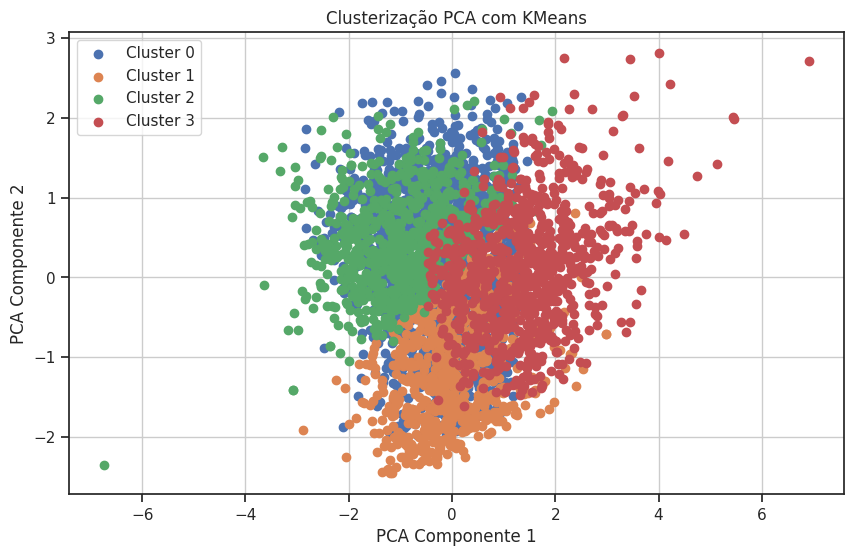

In [28]:
import matplotlib.pyplot as plt

# Cria um gráfico de dispersão com os pontos coloridos pelos clusters
plt.figure(figsize=(10, 6))

for cluster in range(4):  # Número de clusters definido no KMeans
    cluster_points = df_pca_kmeans[df_clusterization['Cluster_PCA_KMeans'] == cluster]
    plt.scatter(cluster_points['PCA_1'], cluster_points['PCA_2'], label=f'Cluster {cluster}')

# Adiciona rótulos e legendas
plt.title('Clusterização PCA com KMeans')
plt.xlabel('PCA Componente 1')
plt.ylabel('PCA Componente 2')
plt.legend()
plt.grid(True)

# Mostra o gráfico
plt.show()


Como observado, o agrupamento mais distinguivel ocorreu no PCA-KPrototype.

### 4.5 Anexando o PCA - KPrototype no df original

In [30]:
# Copia a coluna Cluster_PCA_KPrototype para o DataFrame original df
df['Cluster_PCA_KPrototype'] = df_clusterization['Cluster_PCA_KPrototype']

In [31]:
df

CO_ACOMPANHAMENTO  \
0     455FA09C6AE623A008EED25FF3B1ADB19290D9D7   
1     70BFCE196D8345BDF4D641B04C4F4E6E19C0B289   
2     67A340F29461447555E52D92D8ADD66D703398F6   
3     458B0450884D0F5CFA443D518E652EAC4CCDAE63   
4     B85162FD6C466A82908E9DC95574838304BDD0B5   
...                                        ...   
3831  495FAD886AB05384ECB278CAD674B8EE3D43E1E3   
3832  826B1BC53757CD481D13A54D864F385D0B651B6C   
3833  4AFC9710314E7F621FA1F6B796861E4DDF6D96E8   
3834  D3F577DB143CDDFC7BC37E429F3E34EBC2C3F70B   
3835  980A1BEC96E7C8B0BE318251A343ED7F66B88042   

                              CO_PESSOA_SISVAN    CO_CNES  NU_IDADE_ANO  \
0     B5680467DA7144DF565999BDCB6E8195BECDB689  2795396.0            52   
1     1DC24A843C4347557763139BA3660306D5651277  2795396.0            27   
2     56305BAB97DC8C5CD87469151615228CCC842BC4  2795396.0            27   
3     7E50D21C7FD1A9F2BD50135670DD3ABAA1E58966  2795396.0            31   
4     64B00DA39AB2AF5FAD42E8F34D76F6380C341FB2  2795396.0            44   
...                                        ...        ...           ...   
3831  51C3079966C1F6BABECDB4652AD3D0C302D594A7  7780311.0            68   
3832  8BD31B1DCA2F42271A79F48141331E60B127924C  6373488.0            71   
3833  0E9ED48DFC8446E8A92C45E2BA8A2872CEFC401C  2212889.0            56   
3834  3AA3F4C359128FE737865105614C27AD78D6FBFC  2213087.0            54   
3835  66FE82C291862A152DE11EB004B1E0FC73EF3986  2212889.0            58   

     DS_FASE_VIDA SG_SEXO DT_ACOMPANHAMENTO  NU_COMPETENCIA  NU_PESO  \
0          ADULTO       F        2022-01-07          202201     53.0   
1          ADULTO       F        2022-01-20          202201     42.0   
2          ADULTO       M        2022-01-17          202201     70.0   
3          ADULTO       M        2022-01-19          202201     75.0   
4          ADULTO       M        2022-01-17          202201     95.0   
...           ...     ...               ...             ...      ...   
3831        IDOSO       F        2022-12-15          202212     77.0   
3832        IDOSO       M        2022-12-22          202212     48.0   
3833       ADULTO       F        2022-12-14          202212     75.5   
3834       ADULTO       F        2022-12-26          202212     77.0   
3835       ADULTO       F        2022-12-08          202212     49.8   

      NU_ALTURA  DS_IMC        CO_ESTADO_NUTRI  ANO_ACOMPANHAMENTO  \
0         157.0   21.50  Adequado ou eutrófico                2022   
1         145.0   19.98  Adequado ou eutrófico                2022   
2         180.0   21.60  Adequado ou eutrófico                2022   
3         162.0   28.58              Sobrepeso                2022   
4         162.0   36.20      Obesidade Grau II                2022   
...         ...     ...                    ...                 ...   
3831      172.0   26.03  Adequado ou eutrófico                2022   
3832      158.0   19.23             Baixo peso                2022   
3833      168.0   26.75              Sobrepeso                2022   
3834      165.0   28.28              Sobrepeso                2022   
3835      153.0   21.27  Adequado ou eutrófico                2022   

      Cluster_PCA_KPrototype  
0                          1  
1                          1  
2                          2  
3                          1  
4                          2  
...                      ...  
3831                       3  
3832                       0  
3833                       3  
3834                       3  
3835                       0  

[3836 rows x 14 columns]


Análise do Cluster 0:

       NU_IDADE_ANO     NU_PESO   NU_ALTURA      DS_IMC
count         880.0  880.000000  880.000000  880.000000
mean        67.0375   64.525557  153.798295   27.385398
std         9.31925   10.634262    6.217379    4.856955
min            29.0    0.870000   70.000000    0.000000
25%            60.0   58.000000  150.000000   24.220000
50%            66.0   65.000000  154.000000   27.215000
75%            72.0   71.000000  158.000000   30.305000
max            99.0   98.000000  174.000000   50.000000


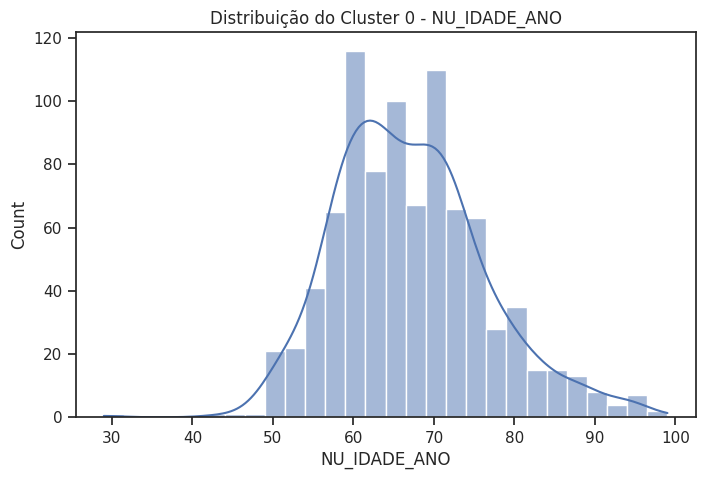

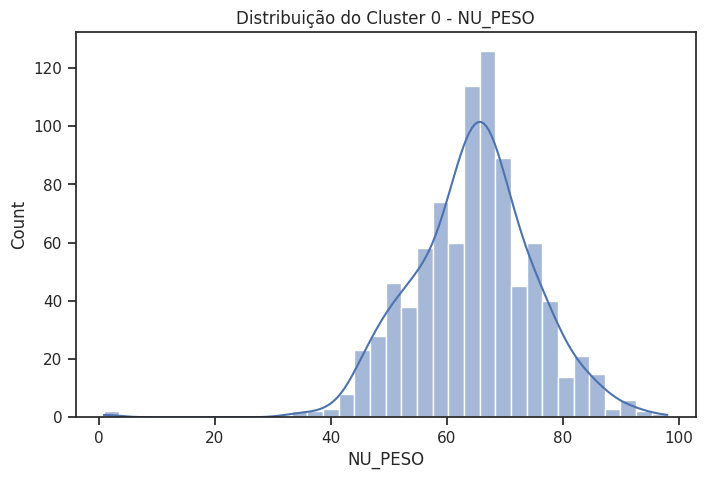

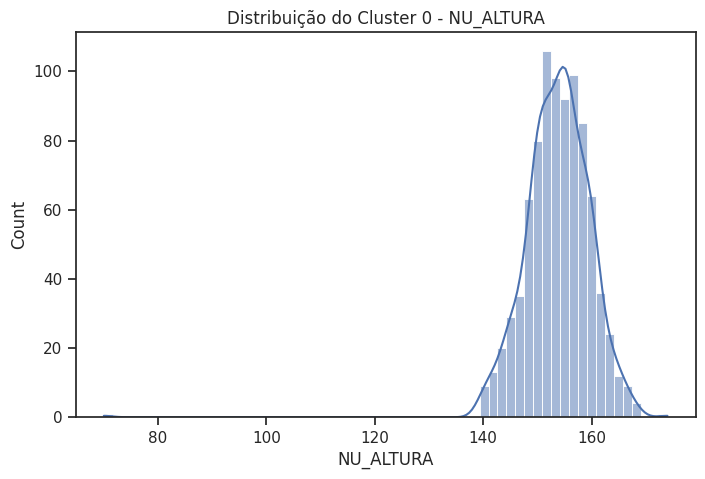

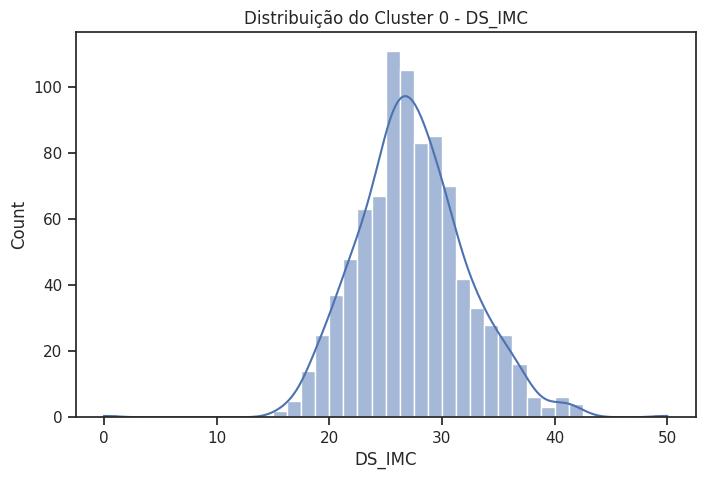


Análise do Cluster 1:

       NU_IDADE_ANO      NU_PESO    NU_ALTURA       DS_IMC
count        1368.0  1368.000000  1368.000000  1368.000000
mean      37.176901    67.551440   161.013670    26.176842
std       10.237887    11.245084     6.287633     4.920705
min            20.0    26.220000   141.000000     9.990000
25%            29.0    60.000000   157.000000    22.770000
50%            37.0    67.000000   161.000000    25.530000
75%            46.0    75.000000   165.000000    29.030000
max            59.0   103.000000   181.000000    47.020000


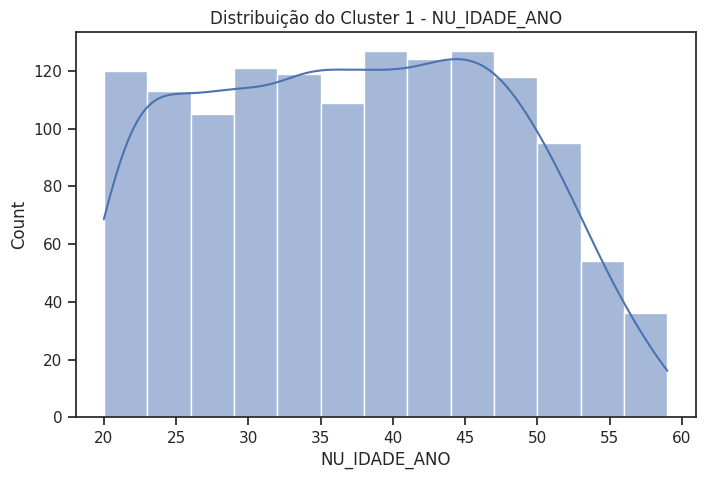

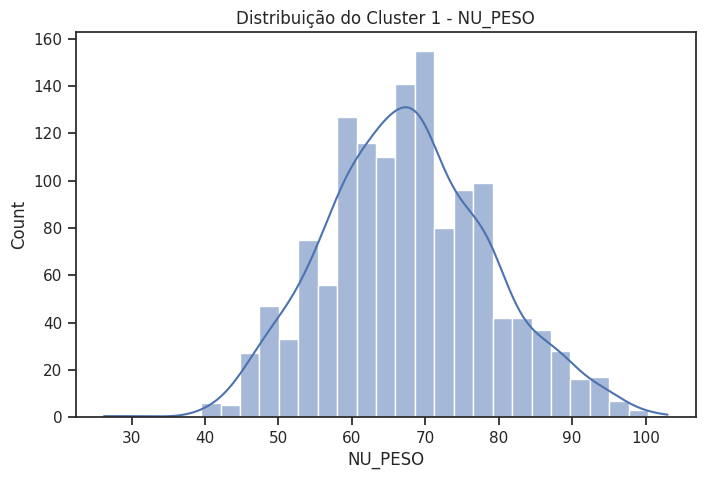

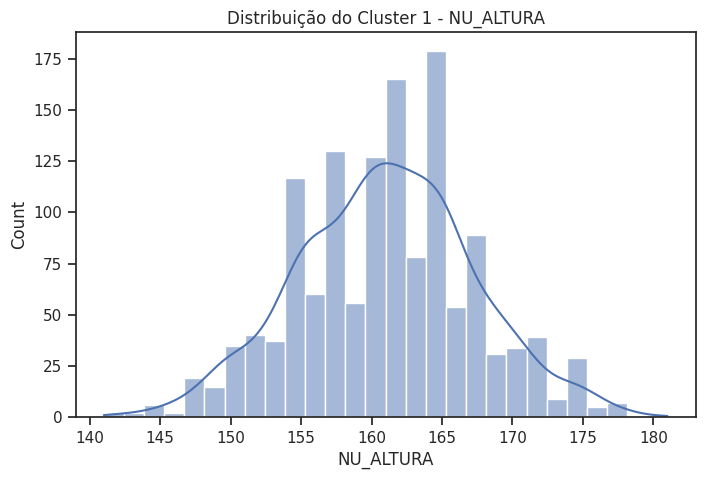

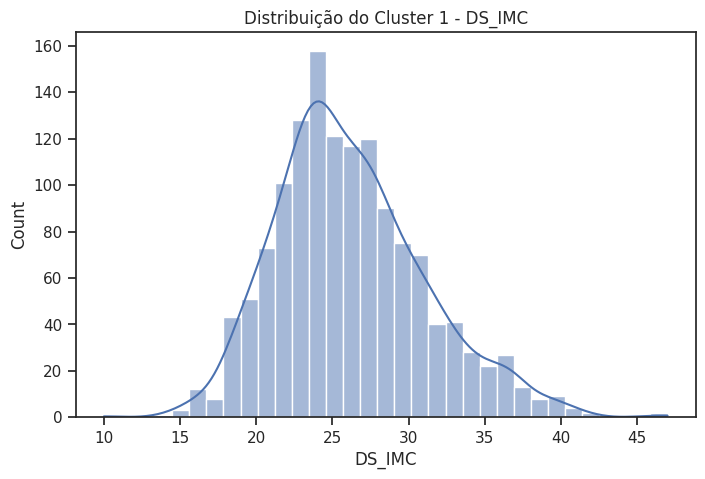


Análise do Cluster 2:

       NU_IDADE_ANO     NU_PESO   NU_ALTURA      DS_IMC
count         796.0  796.000000  796.000000  796.000000
mean      41.743719   95.208668  173.354271   31.914447
std       10.385629   17.792594    7.085293    6.907046
min            20.0   61.000000  153.000000   17.820000
25%            35.0   83.000000  169.000000   27.100000
50%            42.0   92.000000  174.000000   30.455000
75%            49.0  103.225000  178.000000   35.065000
max            72.0  220.000000  197.000000   67.150000


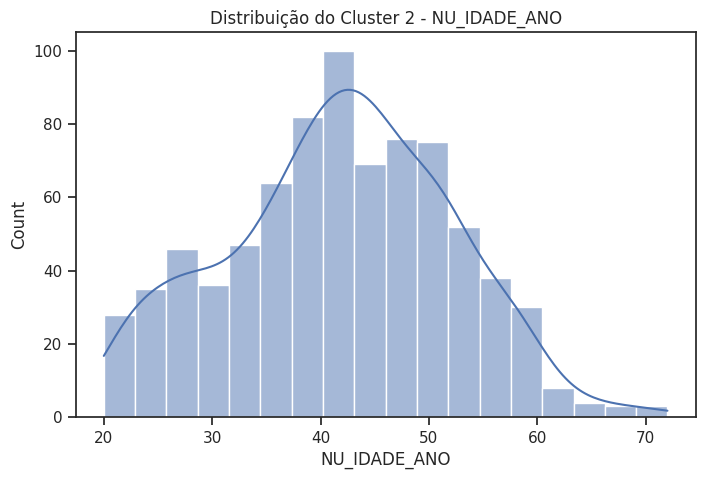

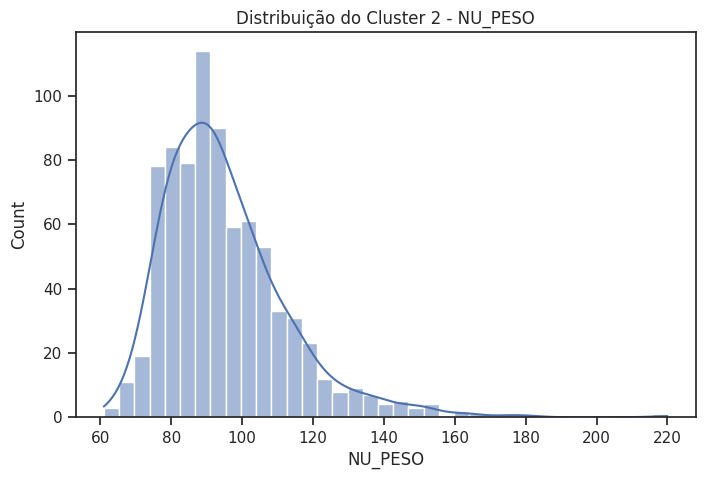

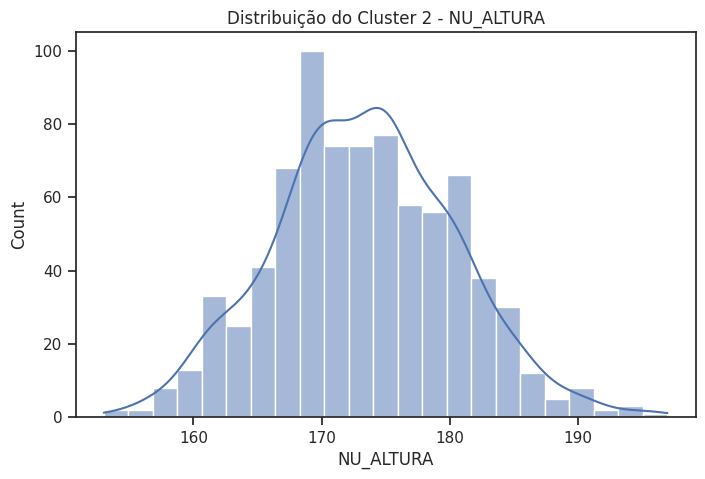

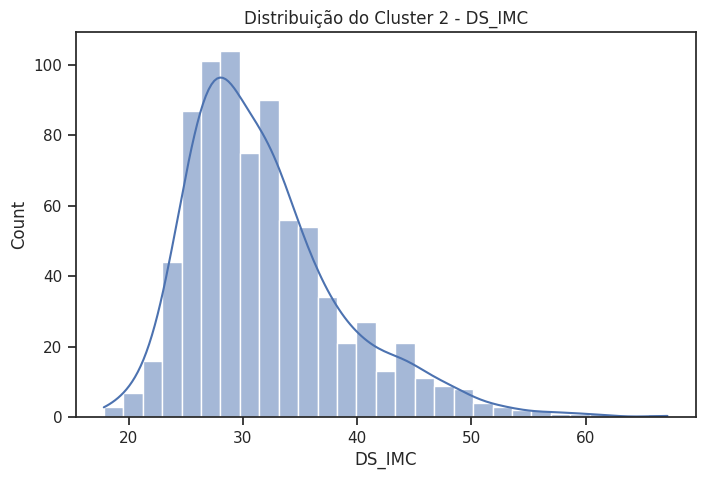


Análise do Cluster 3:

       NU_IDADE_ANO     NU_PESO   NU_ALTURA      DS_IMC
count         792.0  792.000000  792.000000  792.000000
mean      65.419192   81.270265  166.551768   29.506086
std        8.392311   12.032176    6.164401    5.520001
min            47.0   51.000000  149.000000   16.460000
25%           59.75   74.000000  162.000000   25.910000
50%            64.0   80.000000  166.000000   28.705000
75%            70.0   87.000000  170.250000   31.960000
max            93.0  157.000000  190.000000   63.690000


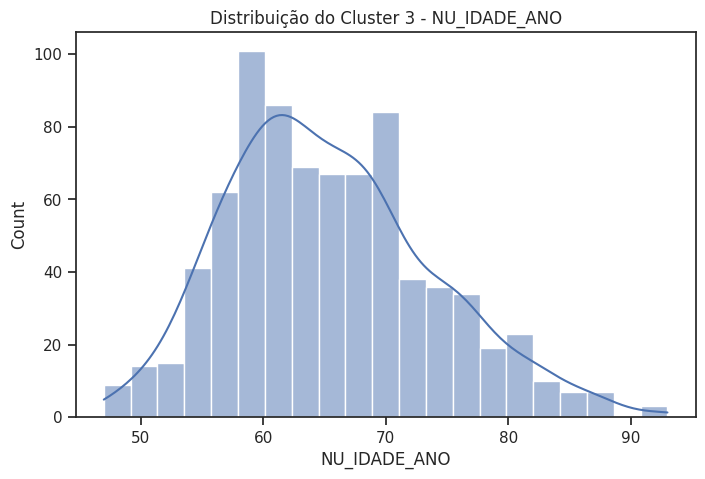

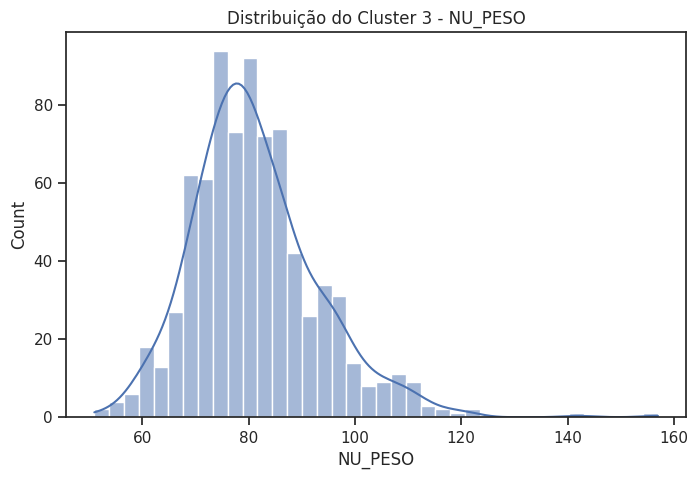

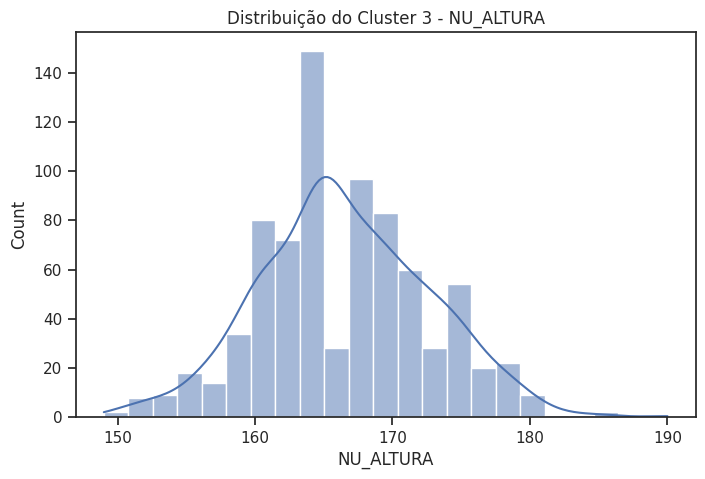

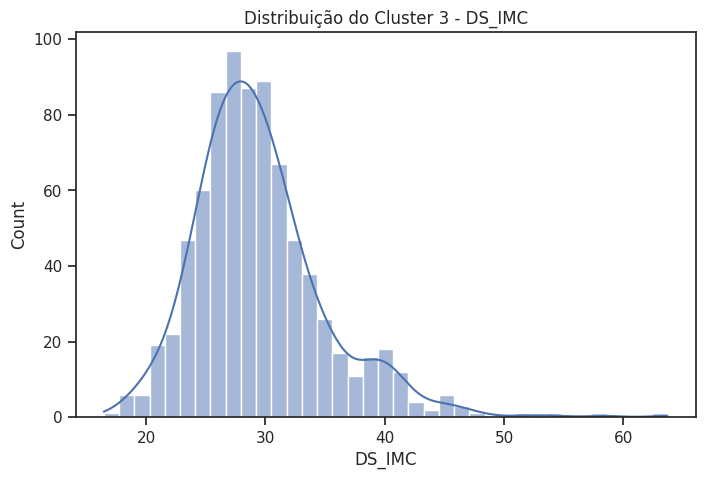

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra o DataFrame para incluir apenas a clusterização desejada e exclui colunas especificadas
columns_to_exclude = ['CO_CNES', 'DT_ACOMPANHAMENTO', 'NU_COMPETENCIA']
cluster_df = df.drop(columns=columns_to_exclude)

# Seleciona apenas colunas numéricas para a análise
numeric_columns = ['NU_IDADE_ANO', 'NU_PESO', 'NU_ALTURA', 'DS_IMC']
cluster_df_numeric = cluster_df[numeric_columns + ['Cluster_PCA_KPrototype']]

# Função para realizar a análise intracluster
def intracluster_analysis(data, cluster_column):
    # Agrupa o DataFrame por cluster
    clusters_grouped = data.groupby(cluster_column)
    
    # Itera sobre cada cluster para realizar análises
    for cluster, cluster_data in clusters_grouped:
        print(f"\nAnálise do Cluster {cluster}:\n")
        
        # Estatísticas descritivas para variáveis numéricas
        print(cluster_data[numeric_columns].describe())
        
        # Gráficos de distribuição para variáveis numéricas
        for column in numeric_columns:
            plt.figure(figsize=(8, 5))
            sns.histplot(cluster_data[column], kde=True)
            plt.title(f'Distribuição do Cluster {cluster} - {column}')
            plt.show()

# Executa a análise intracluster
intracluster_analysis(cluster_df_numeric, 'Cluster_PCA_KPrototype')



Análise do Cluster 0 - Colunas Categóricas:


Contagem de valores em DS_FASE_VIDA:

DS_FASE_VIDA
IDOSO     695
ADULTO    185
Name: count, dtype: int64

Contagem de valores em SG_SEXO:

SG_SEXO
F    761
M    119
Name: count, dtype: int64

Contagem de valores em CO_ESTADO_NUTRI:

CO_ESTADO_NUTRI
Sobrepeso                449
Adequado ou eutrófico    287
Baixo peso                97
Obesidade Grau I          37
Obesidade Grau II         10
Name: count, dtype: int64


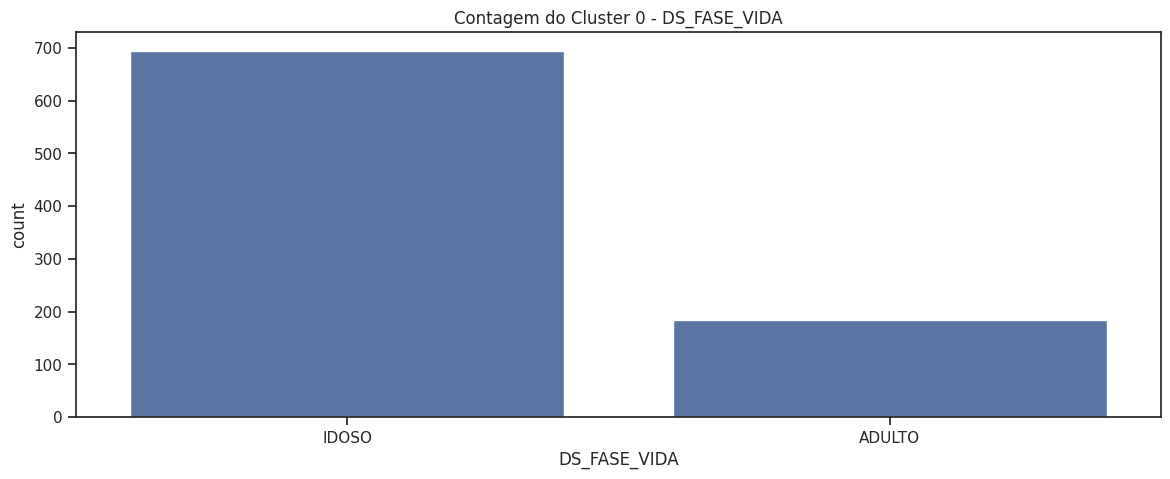

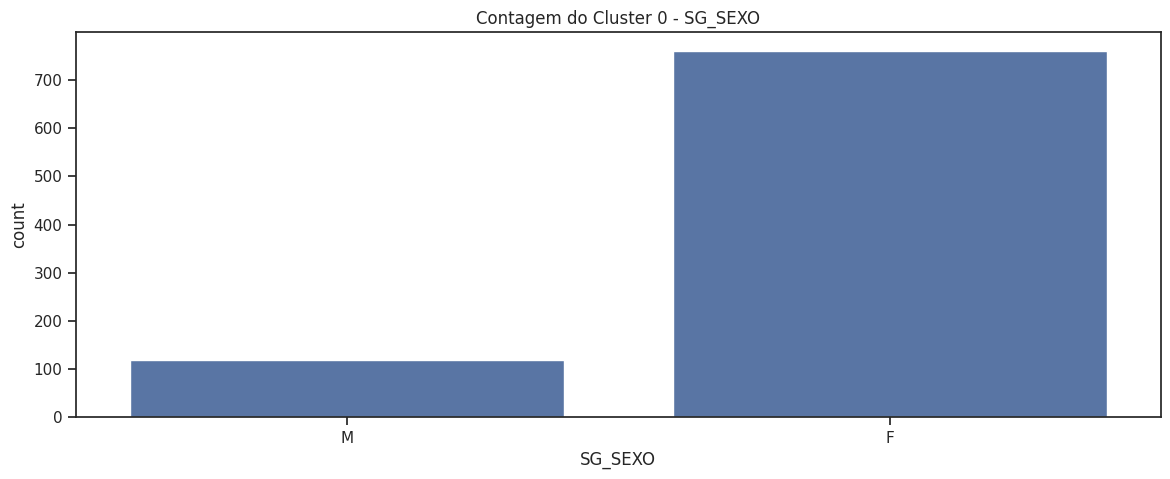

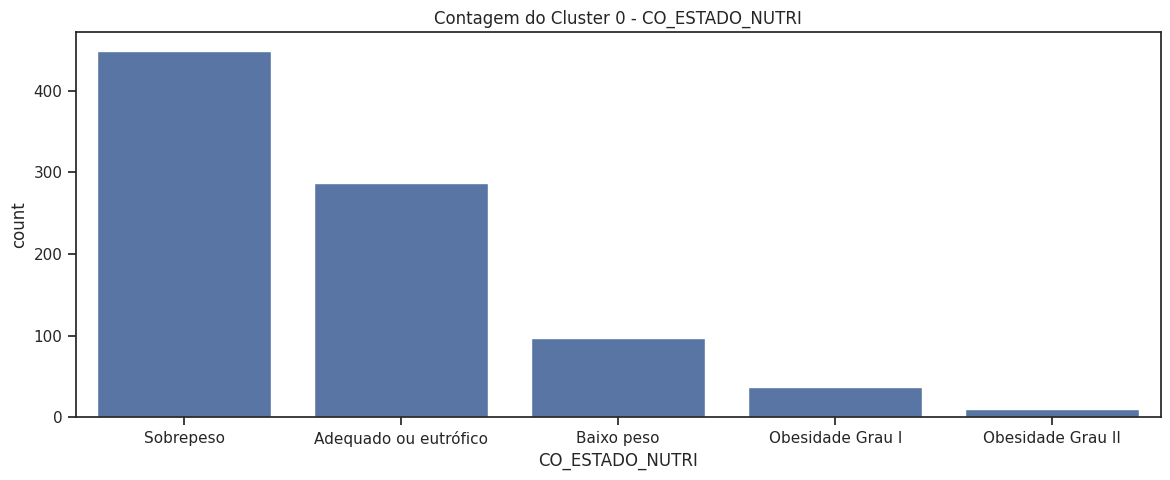


Análise do Cluster 1 - Colunas Categóricas:


Contagem de valores em DS_FASE_VIDA:

DS_FASE_VIDA
ADULTO    1368
Name: count, dtype: int64

Contagem de valores em SG_SEXO:

SG_SEXO
F    1166
M     202
Name: count, dtype: int64

Contagem de valores em CO_ESTADO_NUTRI:

CO_ESTADO_NUTRI
Adequado ou eutrófico    580
Sobrepeso                460
Obesidade Grau I         205
Obesidade Grau II         72
Baixo peso                43
Obesidade Grau III         8
Name: count, dtype: int64


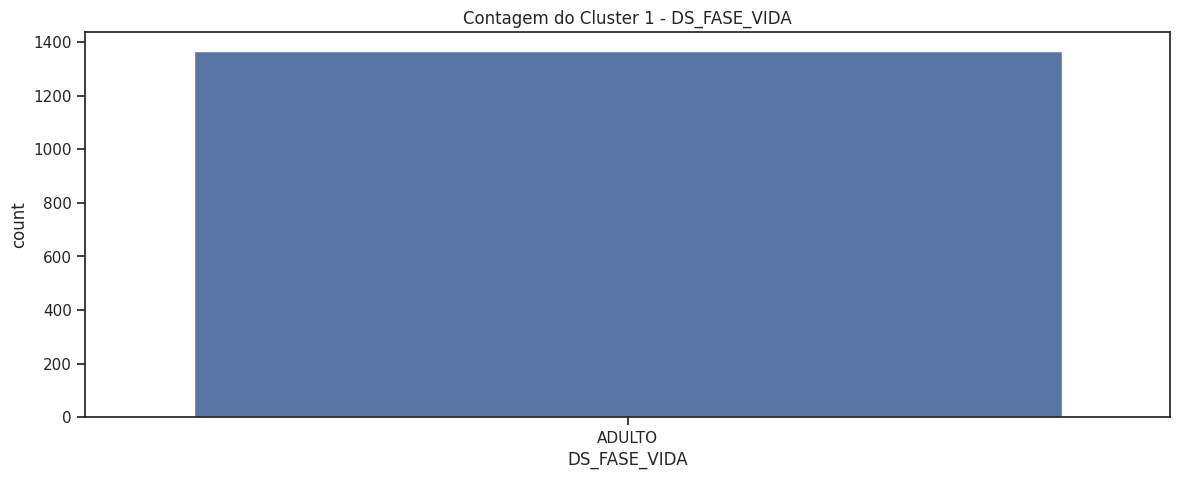

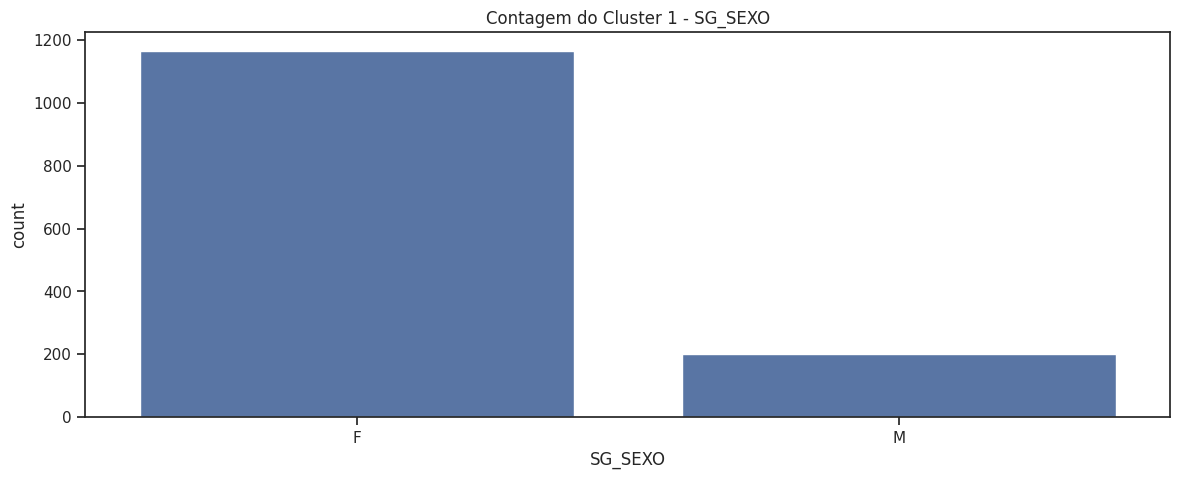

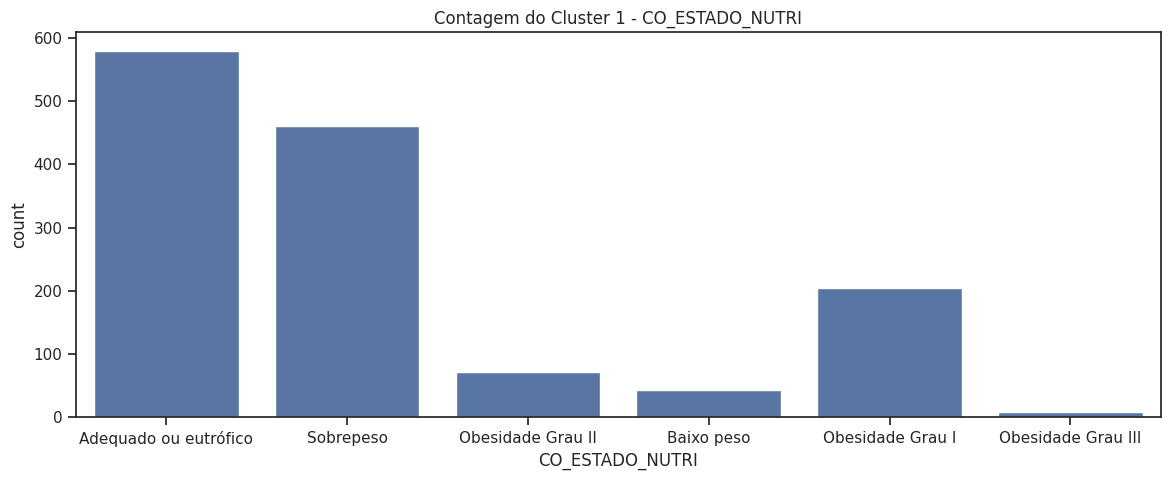


Análise do Cluster 2 - Colunas Categóricas:


Contagem de valores em DS_FASE_VIDA:

DS_FASE_VIDA
ADULTO    772
IDOSO      24
Name: count, dtype: int64

Contagem de valores em SG_SEXO:

SG_SEXO
M    504
F    292
Name: count, dtype: int64

Contagem de valores em CO_ESTADO_NUTRI:

CO_ESTADO_NUTRI
Sobrepeso                296
Obesidade Grau I         216
Obesidade Grau III       101
Obesidade Grau II         96
Adequado ou eutrófico     84
Baixo peso                 3
Name: count, dtype: int64


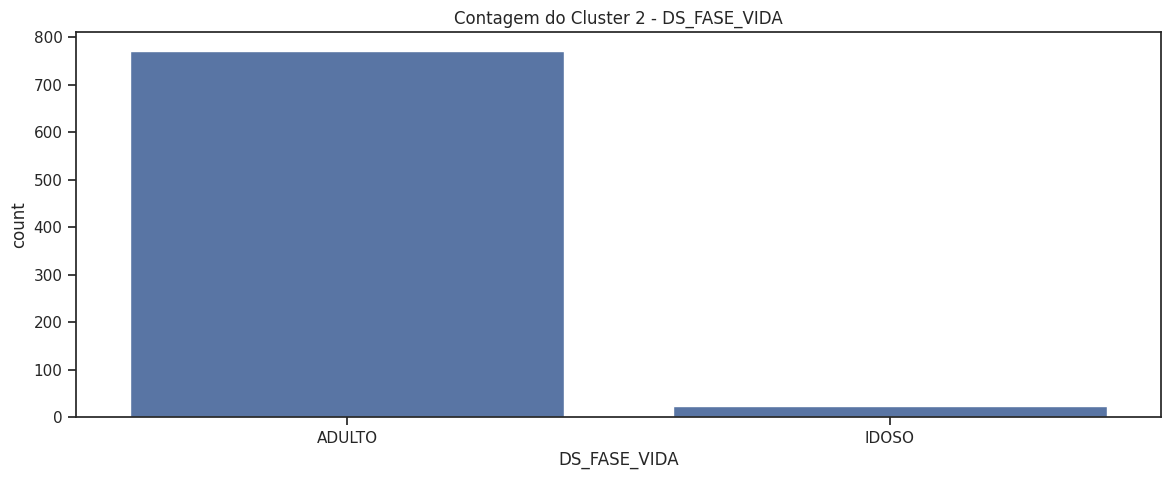

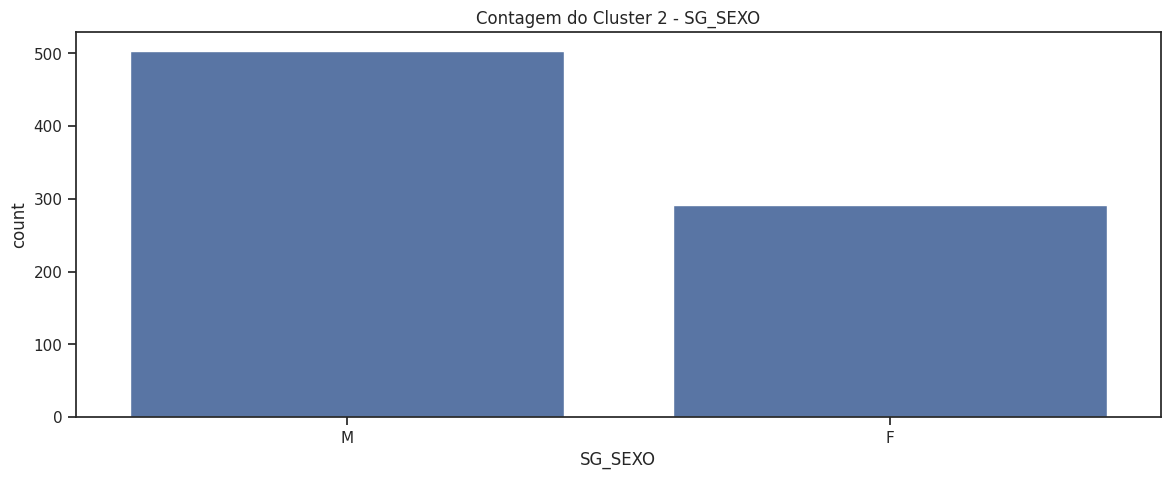

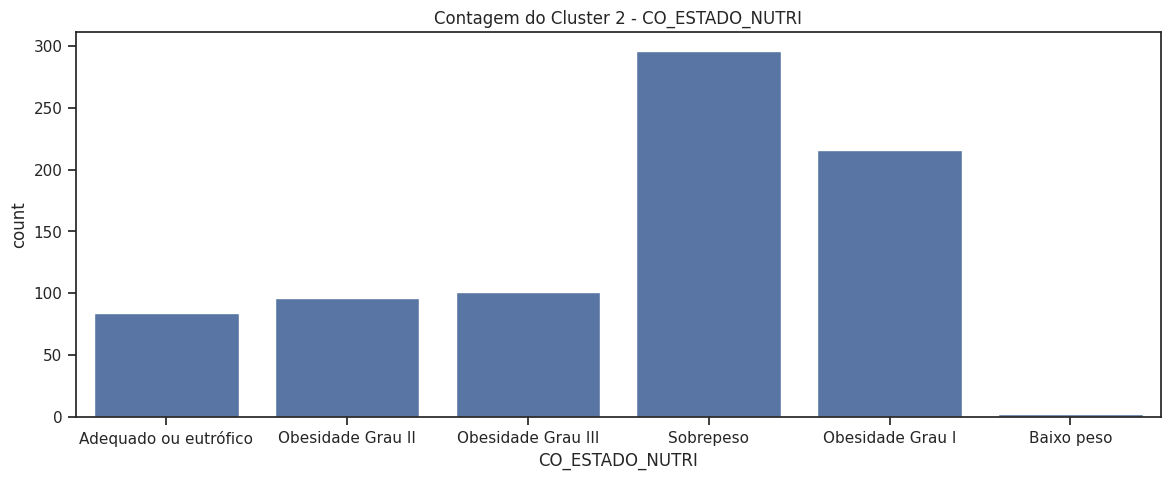


Análise do Cluster 3 - Colunas Categóricas:


Contagem de valores em DS_FASE_VIDA:

DS_FASE_VIDA
IDOSO     596
ADULTO    196
Name: count, dtype: int64

Contagem de valores em SG_SEXO:

SG_SEXO
M    526
F    266
Name: count, dtype: int64

Contagem de valores em CO_ESTADO_NUTRI:

CO_ESTADO_NUTRI
Sobrepeso                484
Adequado ou eutrófico    191
Obesidade Grau I          48
Baixo peso                35
Obesidade Grau III        20
Obesidade Grau II         14
Name: count, dtype: int64


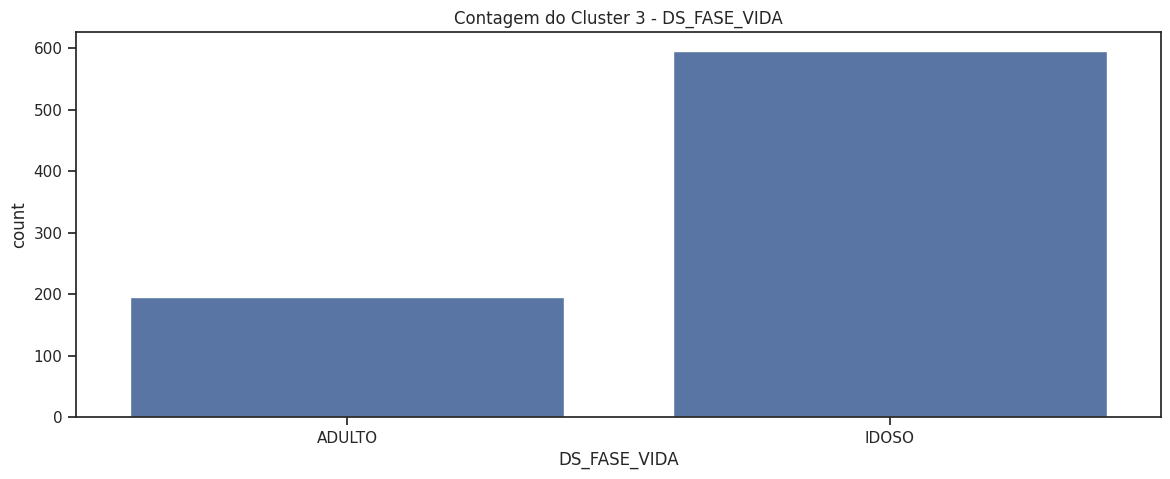

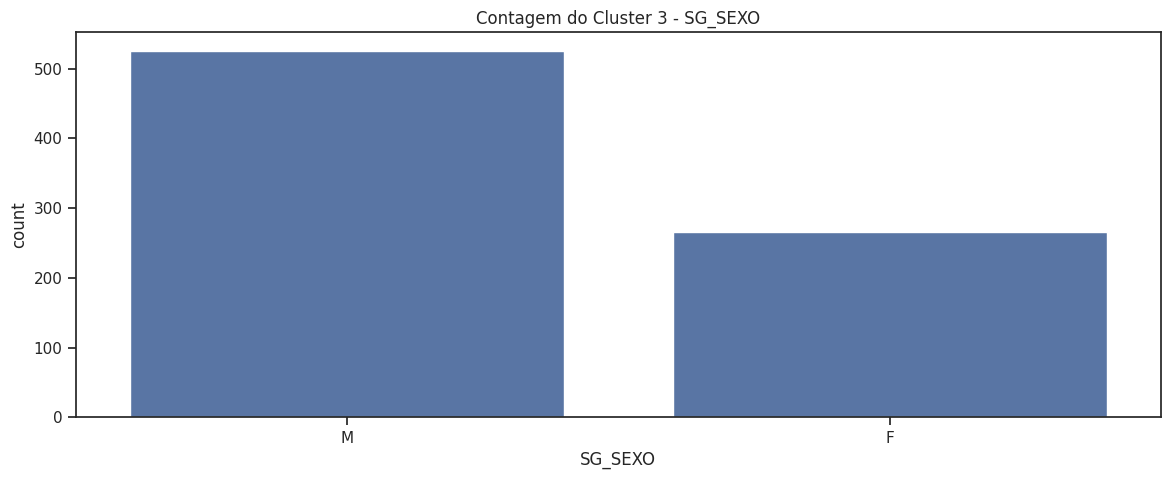

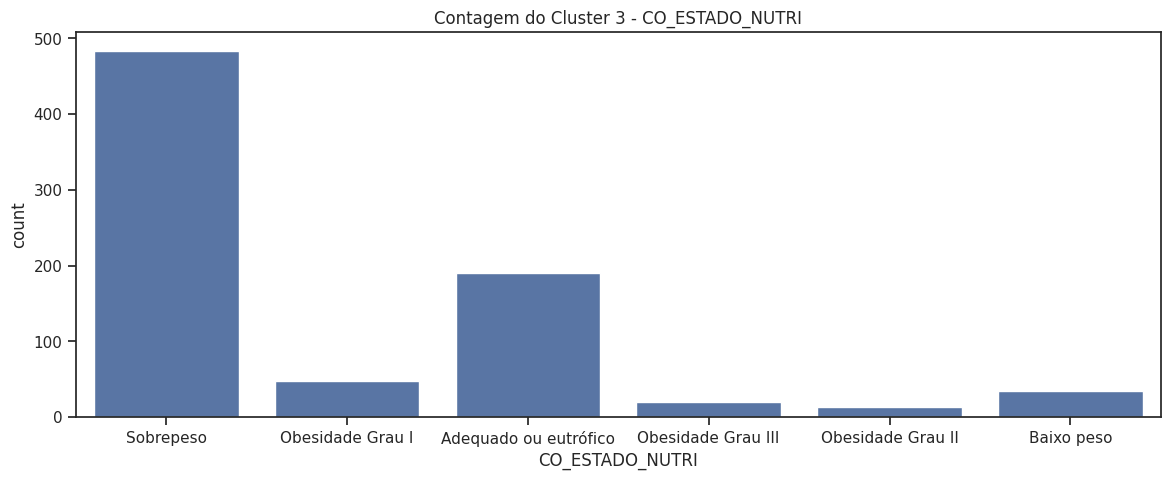

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra o DataFrame para incluir apenas a clusterização desejada e exclui colunas especificadas
columns_to_exclude = ['CO_CNES', 'DT_ACOMPANHAMENTO', 'NU_COMPETENCIA']
cluster_df = df.drop(columns=columns_to_exclude)

# Seleciona apenas colunas categóricas para a análise
categorical_columns = ['DS_FASE_VIDA', 'SG_SEXO', 'CO_ESTADO_NUTRI']
cluster_df_categorical = cluster_df[categorical_columns + ['Cluster_PCA_KPrototype']]

# Função para realizar a análise intracluster de colunas categóricas
def intracluster_categorical_analysis(data, cluster_column):
    # Agrupa o DataFrame por cluster
    clusters_grouped = data.groupby(cluster_column)
    
    # Itera sobre cada cluster para realizar análises
    for cluster, cluster_data in clusters_grouped:
        print(f"\nAnálise do Cluster {cluster} - Colunas Categóricas:\n")
        
        # Contagem de ocorrências de cada valor em colunas categóricas
        for column in categorical_columns:
            print(f"\nContagem de valores em {column}:\n")
            print(cluster_data[column].value_counts())
            
        # Gráficos de contagem para colunas categóricas
        for column in categorical_columns:
            plt.figure(figsize=(14, 5))
            sns.countplot(x=column, data=cluster_data)
            plt.title(f'Contagem do Cluster {cluster} - {column}')
            plt.show()

# Executa a análise intracluster de colunas categóricas
intracluster_categorical_analysis(cluster_df_categorical, 'Cluster_PCA_KPrototype')


# Relatório de Análise de Clusterização

## Introdução

Este relatório apresenta uma análise detalhada da clusterização realizada em um conjunto de dados, destacando quatro clusters distintos. A clusterização foi realizada com base em dados numéricos e categóricos relacionados a características físicas e demográficas.

## Cluster 0

### Perfil Numérico (Atualizado):

- **Idade Média:** 67.04 anos
- **Peso Médio:** 64.53 kg
- **Altura Média:** 153.80 cm
- **IMC Médio:** 27.39
- **Observações:**
  - Idade avançada (média de 67.04 anos).
  - Peso e altura moderados.
  - Predominância de pessoas na fase de vida idosa.
  - Maioria do sexo feminino.
  - Predominância de sobrepeso.

### Perfil Categórico (Atualizado):

- **Fase de Vida:**
  - Idoso: 695
  - Adulto: 185
- **Sexo:**
  - Feminino: 761
  - Masculino: 119
- **Estado Nutricional:**
  - Sobrepeso: 449
  - Adequado ou Eutrófico: 287
  - Baixo Peso: 97
  - Obesidade Grau I: 37
  - Obesidade Grau II: 10

  ### Perfil Principal:
  - Fase de Vida Predominante: Idoso
  - Estatura baixa
  - Sexo Predominante: Feminino
  - Estado Nutricional Predominante: Sobrepeso

## Cluster 1

### Perfil Numérico (Atualizado):

- **Idade Média:** 37.18 anos
- **Peso Médio:** 67.55 kg
- **Altura Média:** 161.01 cm
- **IMC Médio:** 26.18
- **Observações:**
  - Faixa etária mais jovem (média de 37.18 anos).
  - Peso e altura moderados.
  - Predominância de adultos.
  - Maioria do sexo feminino.
  - Variedade no estado nutricional, com prevalência de sobrepeso.

### Perfil Categórico (Atualizado):

- **Fase de Vida:**
  - Adulto: 1368
- **Sexo:**
  - Feminino: 1166
  - Masculino: 202
- **Estado Nutricional:**
  - Adequado ou Eutrófico: 580
  - Sobrepeso: 460
  - Obesidade Grau I: 205
  - Obesidade Grau II: 72
  - Baixo Peso: 43
  - Obesidade Grau III: 8

  ### Perfil Principal:
  - Fase de Vida Predominante: Adulto Jovem
  - Estatura normal
  - Sexo Predominante: Feminino
  - Estado Nutricional Predominante: Adequado ou Eutrófico a Sobrepeso

## Cluster 2

### Perfil Numérico (Atualizado):

- **Idade Média:** 41.74 anos
- **Peso Médio:** 95.21 kg
- **Altura Média:** 173.35 cm
- **IMC Médio:** 31.91
- **Observações:**
  - Faixa etária intermediária (média de 41.74 anos).
  - Peso e altura elevados.
  - Predominância de adultos.
  - Maioria do sexo masculino.
  - Predominância de sobrepeso e obesidade.

### Perfil Categórico (Atualizado):

- **Fase de Vida:**
  - Adulto: 796
  - Idoso: 0 (Atualização: Não há idosos neste cluster)
- **Sexo:**
  - Masculino: 504
  - Feminino: 292
- **Estado Nutricional:**
  - Sobrepeso: 296
  - Obesidade Grau I: 216
  - Obesidade Grau III: 101
  - Obesidade Grau II: 96
  - Adequado ou Eutrófico: 84
  - Baixo Peso: 3

  ### Perfil Principal:
  - Fase de Vida Predominante: Adulto Meia Idade
  - Estatura alta
  - Sexo Predominante: Masculino
  - Estado Nutricional Predominante: Sobrepeso a Obesidade Leve

## Cluster 3

### Perfil Numérico (Atualizado):

- **Idade Média:** 65.42 anos
- **Peso Médio:** 81.27 kg
- **Altura Média:** 166.55 cm
- **IMC Médio:** 29.51
- **Observações:**
  - Idade avançada (média de 65.42 anos).
  - Peso e altura moderados.
  - Predominância de pessoas na fase de vida idosa.
  - Maioria do sexo masculino.
  - Predominância de sobrepeso.

### Perfil Categórico (Atualizado):

- **Fase de Vida:**
  - Idoso: 596
  - Adulto: 196
- **Sexo:**
  - Masculino: 526
  - Feminino: 266
- **Estado Nutricional:**
  - Sobrepeso: 484
  - Adequado ou Eutrófico: 191
  - Obesidade Grau I: 48
  - Baixo Peso: 35
  - Obesidade Grau III: 20
  - Obesidade Grau II: 14

### Perfil Principal:
  - Fase de Vida Predominante: Idoso
  - Estatura normal
  - Sexo Predominante: Masculino
  - Estado Nutricional Predominante: Sobrepeso

## Conclusão

A análise dos clusters destaca variações nos perfis demográficos, físicos e nutricionais em cada cluster, o que demonstra a eficácia da clusterização no objetivo de identificar perfis específicos. Ao examinar as médias numéricas e distribuições categóricas de forma detalhada, pode-se compreender as características distintivas de cada agrupamento.

No Cluster 0, caracterizado por uma média de idade de 67.04 anos e predominantemente composto por indivíduos do sexo feminino na fase idosa, observamos estatura média mais baixa e uma prevalência significativa de sobrepeso.

O Cluster 1, composto principalmente por

 adultos jovens, apresenta médias moderadas de idade (37.18 anos) e características físicas equilibradas. A predominância do sexo feminino e uma diversidade considerável no estado nutricional, com destaque para adequado ou eutrófico a sobrepeso, são aspectos distintivos.

No Cluster 2, observamos uma faixa etária intermediária (41.74 anos), predominantemente do sexo masculino, com médias elevadas de peso, altura e IMC. Este grupo exibe uma prevalência significativa de sobrepeso e obesidade leve a moderada.

No Cluster 3, composto por indivíduos mais idosos, predominantemente do sexo masculino, notamos uma média de idade de 65.42 anos. Apesar de características físicas moderadas, como peso e altura, há uma prevalência notável de sobrepeso.

Essas análises detalhadas oferecem uma compreensão mais específica dos clusters formados, possibilitando a personalização eficaz de estratégias de intervenção para atender às necessidades específicas de cada grupo identificado.

# Referencias 

H. Huang, Z. Xu, and C. Zeng. An Enhanced k-prototype Algorithm for Clustering Categorical Data, Engineering Applications of Artificial Intelligence, 71, 106-116 (2018).

 Zhexue Huang. Extensions to the k-Means Algorithm for Clustering Large Data Sets with Categorical Values, Data Mining and Knowledge Discovery, 2, 283–304 (1998).

Jolliffe, I. T. (2002). Principal Component Analysis. Wiley.

Tzung-Pei Hong, Chia-Hsiu Chen, Chia-Hui Chang. (2015). K-Prototypes: A Generalized Biclustering Algorithm. IEEE Transactions on Knowledge and Data Engineering, 27(3), 577-590.